# Generate training dataset

In [1]:
from sas7bdat import SAS7BDAT
import pandas as pd
import numpy as np

#/Users/fanyangxin/Box/YOCAS Insomnia/Data/
#/Users/wuchuqin/Box/YOCAS Insomnia/Data/

with SAS7BDAT('/Users/wuchuqin/Box/YOCAS Insomnia/Data/demographics.sas7bdat', skip_header=False) as reader:
    de = reader.to_data_frame()
    #de.to_csv("demographics.csv")
    #de.replace('', np.nan,inplace=True)
    
with SAS7BDAT('/Users/wuchuqin/Box/YOCAS Insomnia/Data/symptom.sas7bdat', skip_header=False) as reader:
    sy = reader.to_data_frame()
    #sy.to_csv("symptom.csv")
    #sy.replace('', np.nan,inplace=True)
    
with SAS7BDAT('/Users/wuchuqin/Box/YOCAS Insomnia/Data/isifinal.sas7bdat', skip_header=False) as reader:
    fi = reader.to_data_frame()
    #fi.replace('', np.nan,inplace=True)
        
with SAS7BDAT('/Users/wuchuqin/Box/YOCAS Insomnia/Data/demofin.sas7bdat', skip_header=False) as reader:
    dm = reader.to_data_frame()
    dm.replace('', np.nan,inplace=True)

with SAS7BDAT('/Users/wuchuqin/Box/YOCAS Insomnia/Data/fitness.sas7bdat', skip_header=False) as reader:
    fit = reader.to_data_frame()
    fit.replace('', np.nan,inplace=True)
    #fit.to_csv("fitness.csv")

# Create new features BMI, Average measurement for dominant arm, and total walking distance
## updated BMI for ID333

In [2]:
fit['BMI'] = np.nan
fit['Trial_AVG']=np.nan
fit['Distance']=np.nan
fit['Weight']= fit['Weight'].replace('.',np.nan)
fit['Weight']= fit['Weight'].apply(pd.to_numeric)
fit['RightT1']= fit['RightT1'].apply(pd.to_numeric)
fit['BMI'] = fit['Weight'] * 703 / (fit['Height']**2)
#update BMI for ID333
for i in range(fit.shape[0]):
    if(fit['PtID'][i] == 333):
        fit['BMI'][i] = 22.49453694
        
fit['VO2'] = np.nan
#fit['6MWTD/HR'] = np.nan

for i in range(fit.shape[0]):
    sum=0
    count=0
    if fit.iloc[i,10]=='1':
        
        if not pd.isna(fit.iloc[i,11]):
            sum+=fit.iloc[i,11]
            count+=1
        if not pd.isna(fit.iloc[i,12]):
            sum+=fit.iloc[i,12]
            count+=1
        if not pd.isna(fit.iloc[i,13]):
            sum+=fit.iloc[i,13]
            count+=1
        if not pd.isna(fit.iloc[i,14]):
            sum+=fit.iloc[i,14]
            count+=1
        if count!=0:
            fit['Trial_AVG'][i]=sum/count
    
    elif fit.iloc[i,10]=='2':
        
        if not pd.isna(fit.iloc[i,15]):
            sum+=fit.iloc[i,15]
            count+=1
        if not pd.isna(fit.iloc[i,16]):
            sum+=fit.iloc[i,16]
            count+=1
        if not pd.isna(fit.iloc[i,17]):
            sum+=fit.iloc[i,17]
            count+=1
        if not pd.isna(fit.iloc[i,18]):
            sum+=fit.iloc[i,18]
            count+=1
        if count!=0:
            fit['Trial_AVG'][i]=sum/count
            
    else:
        if not pd.isna(fit.iloc[i,11]):
            sum+=fit.iloc[i,11]
            count+=1
        if not pd.isna(fit.iloc[i,12]):
            sum+=fit.iloc[i,12]
            count+=1
        if not pd.isna(fit.iloc[i,13]):
            sum+=fit.iloc[i,13]
            count+=1
        if not pd.isna(fit.iloc[i,14]):
            sum+=fit.iloc[i,14]
            count+=1
        if not pd.isna(fit.iloc[i,15]):
            sum+=fit.iloc[i,15]
            count+=1
        if not pd.isna(fit.iloc[i,16]):
            sum+=fit.iloc[i,16]
            count+=1
        if not pd.isna(fit.iloc[i,17]):
            sum+=fit.iloc[i,17]
            count+=1
        if not pd.isna(fit.iloc[i,18]):
            sum+=fit.iloc[i,18]
            count+=1
        if count!=0:
            fit['Trial_AVG'][i]=sum/count
    
for i in range(fit.shape[0]):
    if not pd.isna(fit.iloc[i,21]):
        if not pd.isna(fit.iloc[i,22]):
            fit['Distance'][i]=fit.iloc[i,21]+fit.iloc[i,22]/12
        else:
            fit['Distance'][i]=fit.iloc[i,21]

for i in range(fit.shape[0]):
    if not pd.isna(fit.iloc[i,73]):
        fit['VO2'][i] = 0.1 * (fit['Distance'][i]/3.281/6) + 3.5
        #fit['6MWTD/HR'][i] = fit['Distance'][i]/0.1/3.281

<ipython-input-2-9a8e451e1479>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit['BMI'][i] = 22.49453694
<ipython-input-2-9a8e451e1479>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit['Trial_AVG'][i]=sum/count
<ipython-input-2-9a8e451e1479>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit['Trial_AVG'][i]=sum/count
<ipython-input-2-9a8e451e1479>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [3]:
new_dm = dm[['ptid','cstage','cDXCode','cecog']].copy()
#new_fit = fit[['PtID','DomArm','BMI','Trial_AVG','Distance','VO2','6MWTD/HR']].copy()
new_fit = fit[['PtID','DomArm','BMI','Trial_AVG','Distance','VO2']].copy()
#new_fit.to_csv("fitness.csv")
new_fit

,PtID,DomArm,BMI,Trial_AVG,Distance,VO2
0,10.0,1,42.375659,25.333333,1371.250000,10.465610
1,15.0,1,37.106842,12.250000,1445.250000,10.841512
2,36.0,1,33.982910,22.666667,1009.083333,8.625893
3,42.0,1,26.605753,20.666667,1609.666667,11.676708
4,1.0,1,36.021488,30.666667,1434.666667,10.787751
...,...,...,...,...,...,...
639,744.0,1,21.927790,12.571429,1301.083333,10.109181
640,717.0,1,34.077256,18.250000,1054.000000,8.854059
641,724.0,1,43.426741,47.333333,1620.000000,11.729198
642,732.0,1,41.441155,20.000000,919.000000,8.168292


Fitness dataset: add columns 5, generate BMI from 6 and 8 (15-40, check outliers). 
generate average using 11-18, create a measure for total walk distance using 21 + 22/12
Dominent arm: 1: right 2: left 3: Ambidextrous

Add these three features cecog, cDXcode, cstage

In [4]:
fi['ISI'].value_counts()
fi = fi[fi['Assessment'] ==1] 
sy_update = sy[['PtID','Pain', 'Fatigue', 'ShortBreath',
       'Weakness', 'Nausea', 'Vomiting', 'SleepProblems', 'DaySleepy',
       'Anxiety', 'Depression', 'ProblemRemember', 'ProblemConcentrate',
       'LackAppetite', 'WeightLoss', 'WeightGain', 'ChangeUrination',
       'Diarrhea', 'Numbness', 'HotFlashes', 'NightSweats', 'ADL', 'Mood',
       'Work', 'Relations', 'PhysicalActivity', 'Walking', 'Exercise', 'QoL']]
sy_update['PtID'] = sy_update['PtID'].apply(pd.to_numeric)  

de_update = de[['PTID','Race', 'Ethnic', 'Gender','HormoneThera', 'regage','MaritalStatus', 'Employed', 
                'WorkHrs','Education', 'Sugery', 'SurgWks', 'Chemo', 'ChemoWks',
                'RadTherapy', 'RadWks', 'HormoneTherapy', 'HormoneWks', 'Exercise']]
de_update['PTID'] = de_update['PTID'].apply(pd.to_numeric)  


import pandas as pd
#fi['ptID'] = de_update['PtID'].apply(pd.to_numeric)  
merge_1 = pd.merge(sy_update,de_update, how='inner', left_on=['PtID'],right_on=['PTID'])
merge_2 = pd.merge(merge_1,fi, how='inner', left_on=['PtID'], right_on=['ptID'])
merge_3 = pd.merge(merge_2,new_fit, how='inner', on=['PtID'])
train_set = pd.merge(merge_3,new_dm, how='inner', left_on=['PtID'], right_on=['ptid'])
train_set = train_set.reset_index()
train_set = train_set.drop(columns=['index'])
train_set = train_set.drop(columns=['ptID'])
train_set = train_set.drop(columns=['PTID'])
train_set = train_set.drop(columns=['ptid'])
train_set = train_set.drop(columns=['Assessment','HormoneWks','RadWks','ChemoWks','SurgWks','HormoneTherapy',
                                   'Sugery','RadTherapy','Chemo'])
#train_set = train_set.drop(columns=['PtID'])
train_set['Gender'] = train_set['Gender'].map({'M': 1, 'F': 0})
train_set['HormoneThera'] = train_set['HormoneThera'].map({'Yes': 1, 'No': 0})
train_set[['Employed','cstage']] = train_set[['Employed','cstage']].apply(pd.to_numeric)
train_set = pd.get_dummies(train_set)
train_set = train_set.replace('',np.nan)
train_set = train_set.apply(pd.to_numeric)

#recode race, ethinic, maritalStatus, Employed, education, and cDXCode
train_set['Race'] = np.nan
for index, race1 in train_set['Race_1'].iteritems():
    if(race1 == 1):
        train_set['Race'][index] = 1
    elif(race1 == 0):
        train_set['Race'][index] = 0
train_set = train_set.drop(columns=['Race_1','Race_3','Race_4','Race_5','Race_6','Race_98','Race_99'])

train_set['Ethnic'] = np.nan
for index, ethnic2 in train_set['Ethnic_2'].iteritems():
    if(ethnic2 == 1):
        train_set['Ethnic'][index] = 1
    elif(ethnic2 == 0):
        train_set['Ethnic'][index] = 0
train_set = train_set.drop(columns=['Ethnic_1','Ethnic_2','Ethnic_9'])

for index, ms in train_set['MaritalStatus'].iteritems():
    if(ms == 1 or ms == 2):
        train_set['MaritalStatus'][index] = 1
    elif(ms == 3 or ms == 4 or ms == 5 or ms == 6):
        train_set['MaritalStatus'][index] = 0

for index, em in train_set['Employed'].iteritems():
    if(em == 1 or em == 2):
        train_set['Employed'][index] = 1
    elif(em == 3 or em == 4 or em == 5):
        train_set['Employed'][index] = 0
        
for index, edu in train_set['Education'].iteritems():
    if(edu == 1 or edu == 2):
        train_set['Education'][index] = 1
    elif(edu == 3 or edu == 4 or edu == 5):
        train_set['Education'][index] = 0
        
train_set['cDXCode'] = np.nan
for index, cdx in train_set['cDXCode_Breast'].iteritems():
    if(cdx == 1):
        train_set['cDXCode'][index] = 1
    elif(cdx == 0):
        train_set['cDXCode'][index] = 0
train_set = train_set.drop(columns=['cDXCode_Alimentary','cDXCode_Breast','cDXCode_Genitourinary Tract','cDXCode_Gynecologic','cDXCode_Head & Neck / Lung','cDXCode_Hematologic','cDXCode_Other'])
train_set.to_csv('final_train_recode.csv')

<ipython-input-4-a92cf07c3726>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sy_update['PtID'] = sy_update['PtID'].apply(pd.to_numeric)
<ipython-input-4-a92cf07c3726>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_update['PTID'] = de_update['PTID'].apply(pd.to_numeric)
<ipython-input-4-a92cf07c3726>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [5]:
#remove sleep relative features
train_set = train_set.drop(columns=['SleepProblems'])
train_set = train_set.drop(columns=['DaySleepy'])
#remove WorkHrs
train_set = train_set.drop(columns=['WorkHrs'])
#remove DomArm
train_set = train_set.drop(columns=['DomArm_1'])
train_set = train_set.drop(columns=['DomArm_2'])
train_set = train_set.drop(columns=['DomArm_3'])

In [5]:

from sklearn.model_selection import train_test_split

y = train_set['ISI']
X = train_set.drop(['ISI'], axis = 1).astype('float64')
X_train, X_test , y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
print(X_train.shape)
train_set['train_test'] = np.nan
i = 0
for ptid in train_set['PtID']:
    for id in X_train['PtID']:
        if(ptid == id):
            train_set['train_test'][i] = 'Training'
            break
    i+=1

        
print(i)


(461, 51)
615


<ipython-input-5-381d0520270e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['train_test'][i] = 'Training'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
train_set['train_test'] = train_set['train_test'].fillna('Testing')


In [7]:

train_set = train_set.drop(columns=['PtID'])
train_set.to_csv("traintest_split.csv")
sy_inventory = train_set[['Pain', 'Fatigue', 'ShortBreath',
       'Weakness', 'Nausea', 'Vomiting','Anxiety', 'Depression', 'ProblemRemember', 'ProblemConcentrate',
       'LackAppetite', 'WeightLoss', 'WeightGain', 'ChangeUrination',
       'Diarrhea', 'Numbness', 'HotFlashes', 'NightSweats','train_test']]
sy_inventory.to_csv("symptom_inventory.csv")

sy_interfered = train_set[['ADL', 'Mood',
       'Work', 'Relations', 'PhysicalActivity', 'Walking', 'Exercise_x', 'QoL','train_test']]
sy_interfered.to_csv("symptom_interfered.csv")

demo = train_set[['Race', 'Ethnic', 'Gender','HormoneThera', 'regage','MaritalStatus', 'Employed', 
                'Education', 'Exercise_y','train_test']]
demo.to_csv("demo.csv")

physical = train_set[['BMI','Trial_AVG','Distance','VO2','cstage','cecog_0','cecog_1','cecog_2 or Greater','cDXCode','train_test']]
physical.to_csv("physical.csv")



In [10]:
from tableone import TableOne
inventory = ['Pain', 'Fatigue', 'ShortBreath',
       'Weakness', 'Nausea', 'Vomiting','Anxiety', 'Depression', 'ProblemRemember', 'ProblemConcentrate',
       'LackAppetite', 'WeightLoss', 'WeightGain', 'ChangeUrination',
       'Diarrhea', 'Numbness', 'HotFlashes', 'NightSweats','train_test']

mytable = TableOne(sy_inventory, columns=inventory, groupby=['train_test'],  pval=True,missing = False)
#print(mytable.tabulate(tablefmt = "latex"))
#mytable.to_latex('inventory.tex')

interfered = ['ADL', 'Mood',
       'Work', 'Relations', 'PhysicalActivity', 'Walking', 'Exercise_x', 'QoL','train_test']
mytable2 = TableOne(sy_interfered, columns=interfered, groupby=['train_test'],  pval=True,missing = False)
mytable2.to_latex('interfered.tex')
mytable2

Grouped by train_test                              
                                           Overall    Testing   Training P-Value
n                                              615        154        461        
ADL, mean (SD)                           3.1 (2.6)  2.9 (2.6)  3.1 (2.6)   0.349
Mood, mean (SD)                          3.0 (2.6)  2.9 (2.6)  3.0 (2.6)   0.737
Work, mean (SD)                          2.6 (2.7)  2.6 (2.8)  2.6 (2.7)   0.877
Relations, mean (SD)                     2.3 (2.6)  2.4 (2.7)  2.2 (2.5)   0.560
PhysicalActivity, mean (SD)              3.6 (2.8)  3.2 (2.8)  3.7 (2.9)   0.087
Walking, mean (SD)                       2.6 (2.8)  2.3 (2.8)  2.6 (2.8)   0.253
Exercise_x, mean (SD)                    3.4 (3.4)  3.0 (3.2)  3.5 (3.4)   0.114
QoL, mean (SD)                           3.3 (2.8)  3.3 (2.8)  3.3 (2.9)   0.891

In [ ]:
demo['Race'].replace({0.0: 'Other', 1.0: 'White'},inplace=True)
demo['Gender'].replace({0: 'Female', 1: 'Male'},inplace=True)
demo['HormoneThera'].replace({0: 'No', 1: 'Yes'},inplace=True)
demo['MaritalStatus'].replace({0.0: 'Other', 1.0: 'Married'},inplace=True)
demo['Employed'].replace({0: 'Unemployed', 1: 'Employed'},inplace=True)
demo['Education'].replace({0.0: 'HS or below', 1.0: 'College or above'},inplace=True)
demo['Ethnic'].replace({0.0: 'Other', 1.0: 'Hispanic'},inplace=True)

demos = ['Race', 'Ethnic', 'Gender','HormoneThera','MaritalStatus', 'Employed', 
                'Education', 'Exercise_y','regage','train_test']
cate = ['Race', 'Ethnic', 'Gender','HormoneThera','MaritalStatus', 'Employed', 'Education']

mytable3 = TableOne(demo,columns=demos, categorical=cate,groupby=['train_test'],  pval=True,missing = False)
mytable3.to_latex('demo.tex')

In [ ]:
columns = ['BMI','Trial_AVG','Distance','VO2','cstage','cecog_0','cecog_1','cecog_2 or Greater','cDXCode','train_test']
cate = ['cstage','cecog_0','cecog_1','cecog_2 or Greater','cDXCode']
label = {'cstage':"Cancer Stage", 'cDXCode':"DXCode",'cecog_0':'ECOG Performance Status = 0','cecog_1':'ECOG Performance Status = 1','cecog_2 or Greater':'ECOG Performance Status >= 2'}
physical['cDXCode'].replace({0:"Other",1:"Breast"},inplace=True)
physical['cstage'].replace({0.0:0,1.0:1,2.0:2,3.0:3,4.0:4},inplace=True)
physical['cecog_0'].replace({0:"No",1:"Yes"},inplace=True)
physical['cecog_1'].replace({0:"No",1:"Yes"},inplace=True)
physical['cecog_2 or Greater'].replace({0:"No",1:"Yes"},inplace=True)

mytable4=TableOne(data = physical, columns = columns,categorical=cate,rename=label,groupby=['train_test'],pval=True,missing=False)
mytable4.to_latex('physical.tex')

In [9]:
isi=TableOne(data =  train_set[['ISI','train_test']],columns=['ISI'],groupby=['train_test'],pval=True)
isi

Grouped by train_test                                            
                              Missing     Overall     Testing    Training P-Value
n                                             615         154         461        
ISI, mean (SD)                      0  15.4 (4.3)  15.1 (3.8)  15.6 (4.5)   0.193

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PtID                615 non-null    int64  
 1   Pain                615 non-null    float64
 2   Fatigue             615 non-null    float64
 3   ShortBreath         615 non-null    float64
 4   Weakness            615 non-null    float64
 5   Nausea              615 non-null    float64
 6   Vomiting            615 non-null    float64
 7   Anxiety             615 non-null    float64
 8   Depression          615 non-null    float64
 9   ProblemRemember     615 non-null    float64
 10  ProblemConcentrate  615 non-null    float64
 11  LackAppetite        615 non-null    float64
 12  WeightLoss          615 non-null    float64
 13  WeightGain          615 non-null    float64
 14  ChangeUrination     615 non-null    float64
 15  Diarrhea            615 non-null    float64
 16  Numbness

In [7]:
#missing data
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
cstage,17,0.027642
Work,5,0.008130
VO2,4,0.006504
Distance,4,0.006504
PhysicalActivity,2,0.003252
Relations,2,0.003252
Mood,2,0.003252
ADL,2,0.003252
Exercise_x,2,0.003252
Exercise_y,1,0.001626


Remove workHrs

### Remove four Wks, keep Surgery, chemo, and etc. At lease one in Chemo, surg, and radtherap

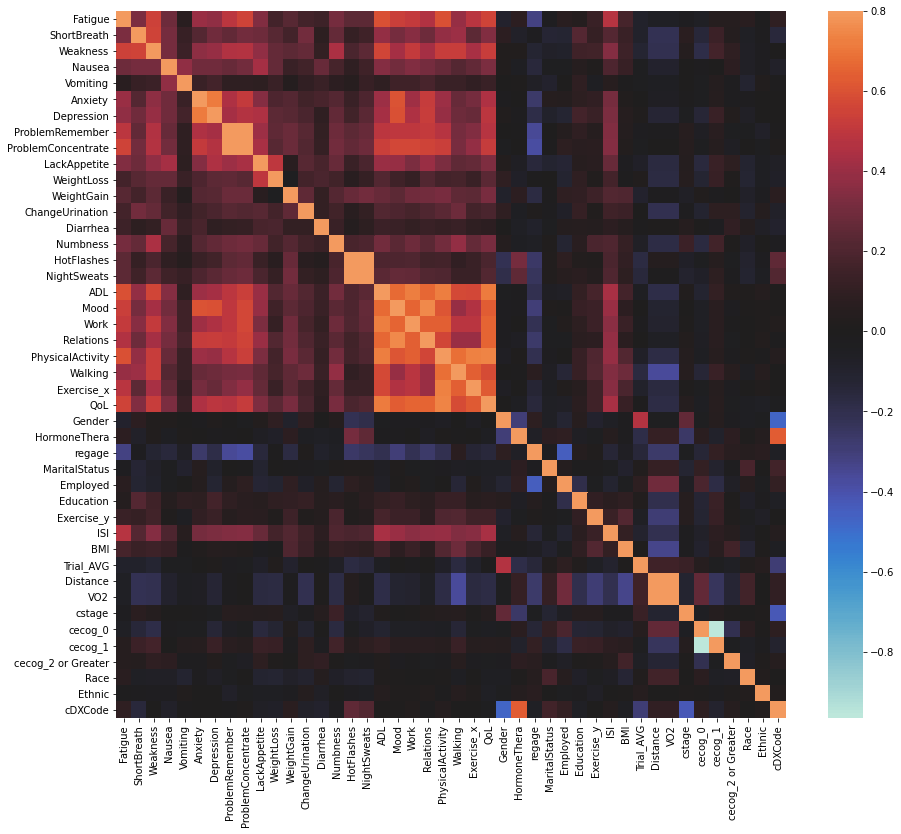

In [25]:
#correlation heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = train_set.iloc[:,1:]
corrmat = corrmat.corr()

f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(corrmat, vmax=0.8,center = 0);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

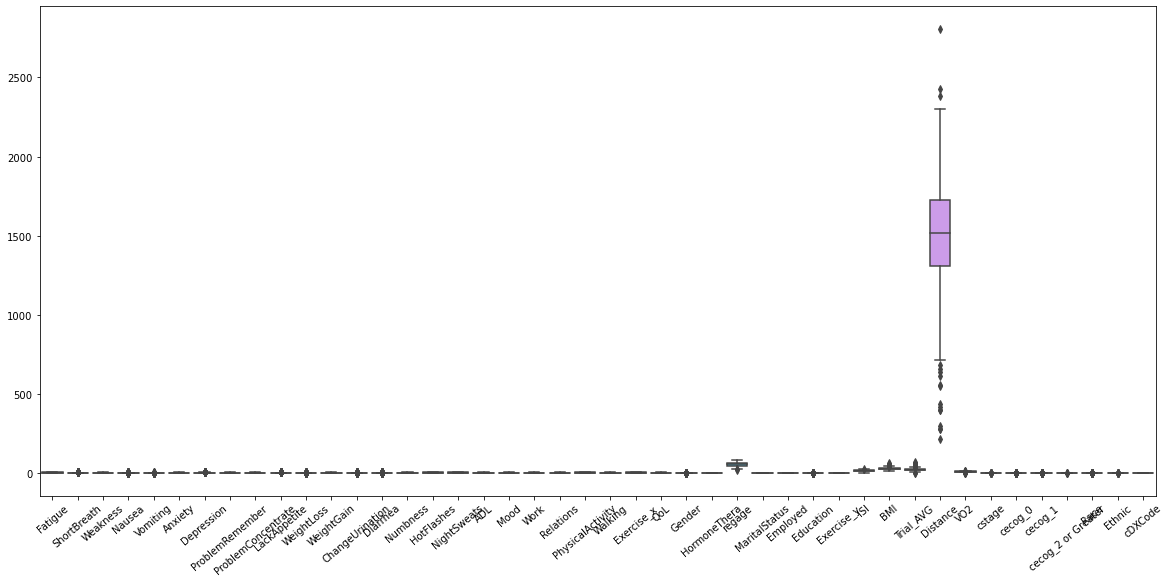

In [26]:
#variance and outliers
va = train_set.iloc[:,1:]
f, ax = plt.subplots(figsize=(20, 9))
sns.boxplot(data = va)
plt.xticks(rotation = 40)

In [20]:
l1=[]
for ID in fi[fi["Assessment"]==1]['ptID']:
    l1.append(ID)
l1=set(l1)

In [21]:
l2=[]
for ID in merge_1['PtID']:
    l2.append(ID)
l2=set(l2)

In [22]:
l3=l1.intersection(l2)
l2.difference(l3)

{4, 57, 196}

# Screening VS baseline

In [3]:
with SAS7BDAT('isifinal.sas7bdat', skip_header=False) as reader:
    df = reader.to_data_frame()

FileNotFoundError: [Errno 2] No such file or directory: 'isifinal.sas7bdat'

In [25]:
ID_0 = []
ID_1 = []
for ID in df[df["Assessment"]==0]['ptID']:
    ID_0.append(ID)

for ID in df[df["Assessment"]==1]['ptID']:
    ID_1.append(ID)

In [26]:
df.shape[0]
diff = set(ID_0).difference(set(ID_1))

In [27]:
ind=[]
for i in range(df.shape[0]):
    if df.loc[i]['ptID'] in diff:
        ind.append(i)

In [28]:
df1 = df[df['Assessment']==0]
df2 = df[df['Assessment']==1]

In [29]:
df_new = pd.merge(df1,df2, how='inner', on=['ptID'])

In [30]:
df_new

,ptID,Assessment_x,ISI_x,Assessment_y,ISI_y
0,1.0,0.0,11.0,1.0,8.0
1,2.0,0.0,18.0,1.0,19.0
2,5.0,0.0,14.0,1.0,17.0
3,6.0,0.0,13.0,1.0,17.0
4,7.0,0.0,13.0,1.0,13.0
...,...,...,...,...,...
614,741.0,0.0,10.0,1.0,10.0
615,742.0,0.0,21.0,1.0,13.0
616,743.0,0.0,18.0,1.0,20.0
617,744.0,0.0,22.0,1.0,8.0


In [31]:
df_new.rename(columns = {"ISI_x": "ISI_0"}, inplace=True)
df_new.rename(columns = {"ISI_y": "ISI_1"}, inplace=True)
df_new = df_new.drop(['Assessment_x' , 'Assessment_y'] , axis='columns')
df_new.to_csv("isfinal_merged.csv")

Correlation between screening and baseline ISI score

In [32]:
df_new['ISI_0'].corr(df_new['ISI_1'])

0.5412472383454929

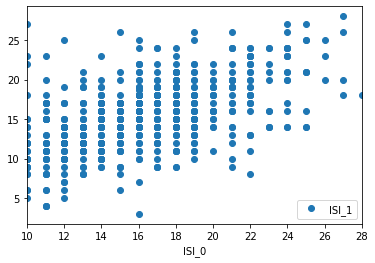

In [33]:
df_new.plot(x='ISI_0', y='ISI_1', style='o')

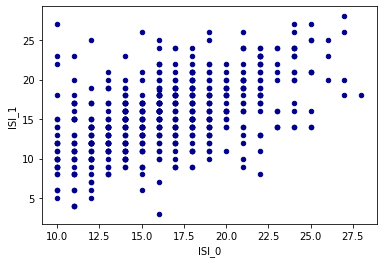

In [34]:
ax1 = df_new.plot.scatter(x='ISI_0',
                      y='ISI_1',
                      c='DarkBlue')

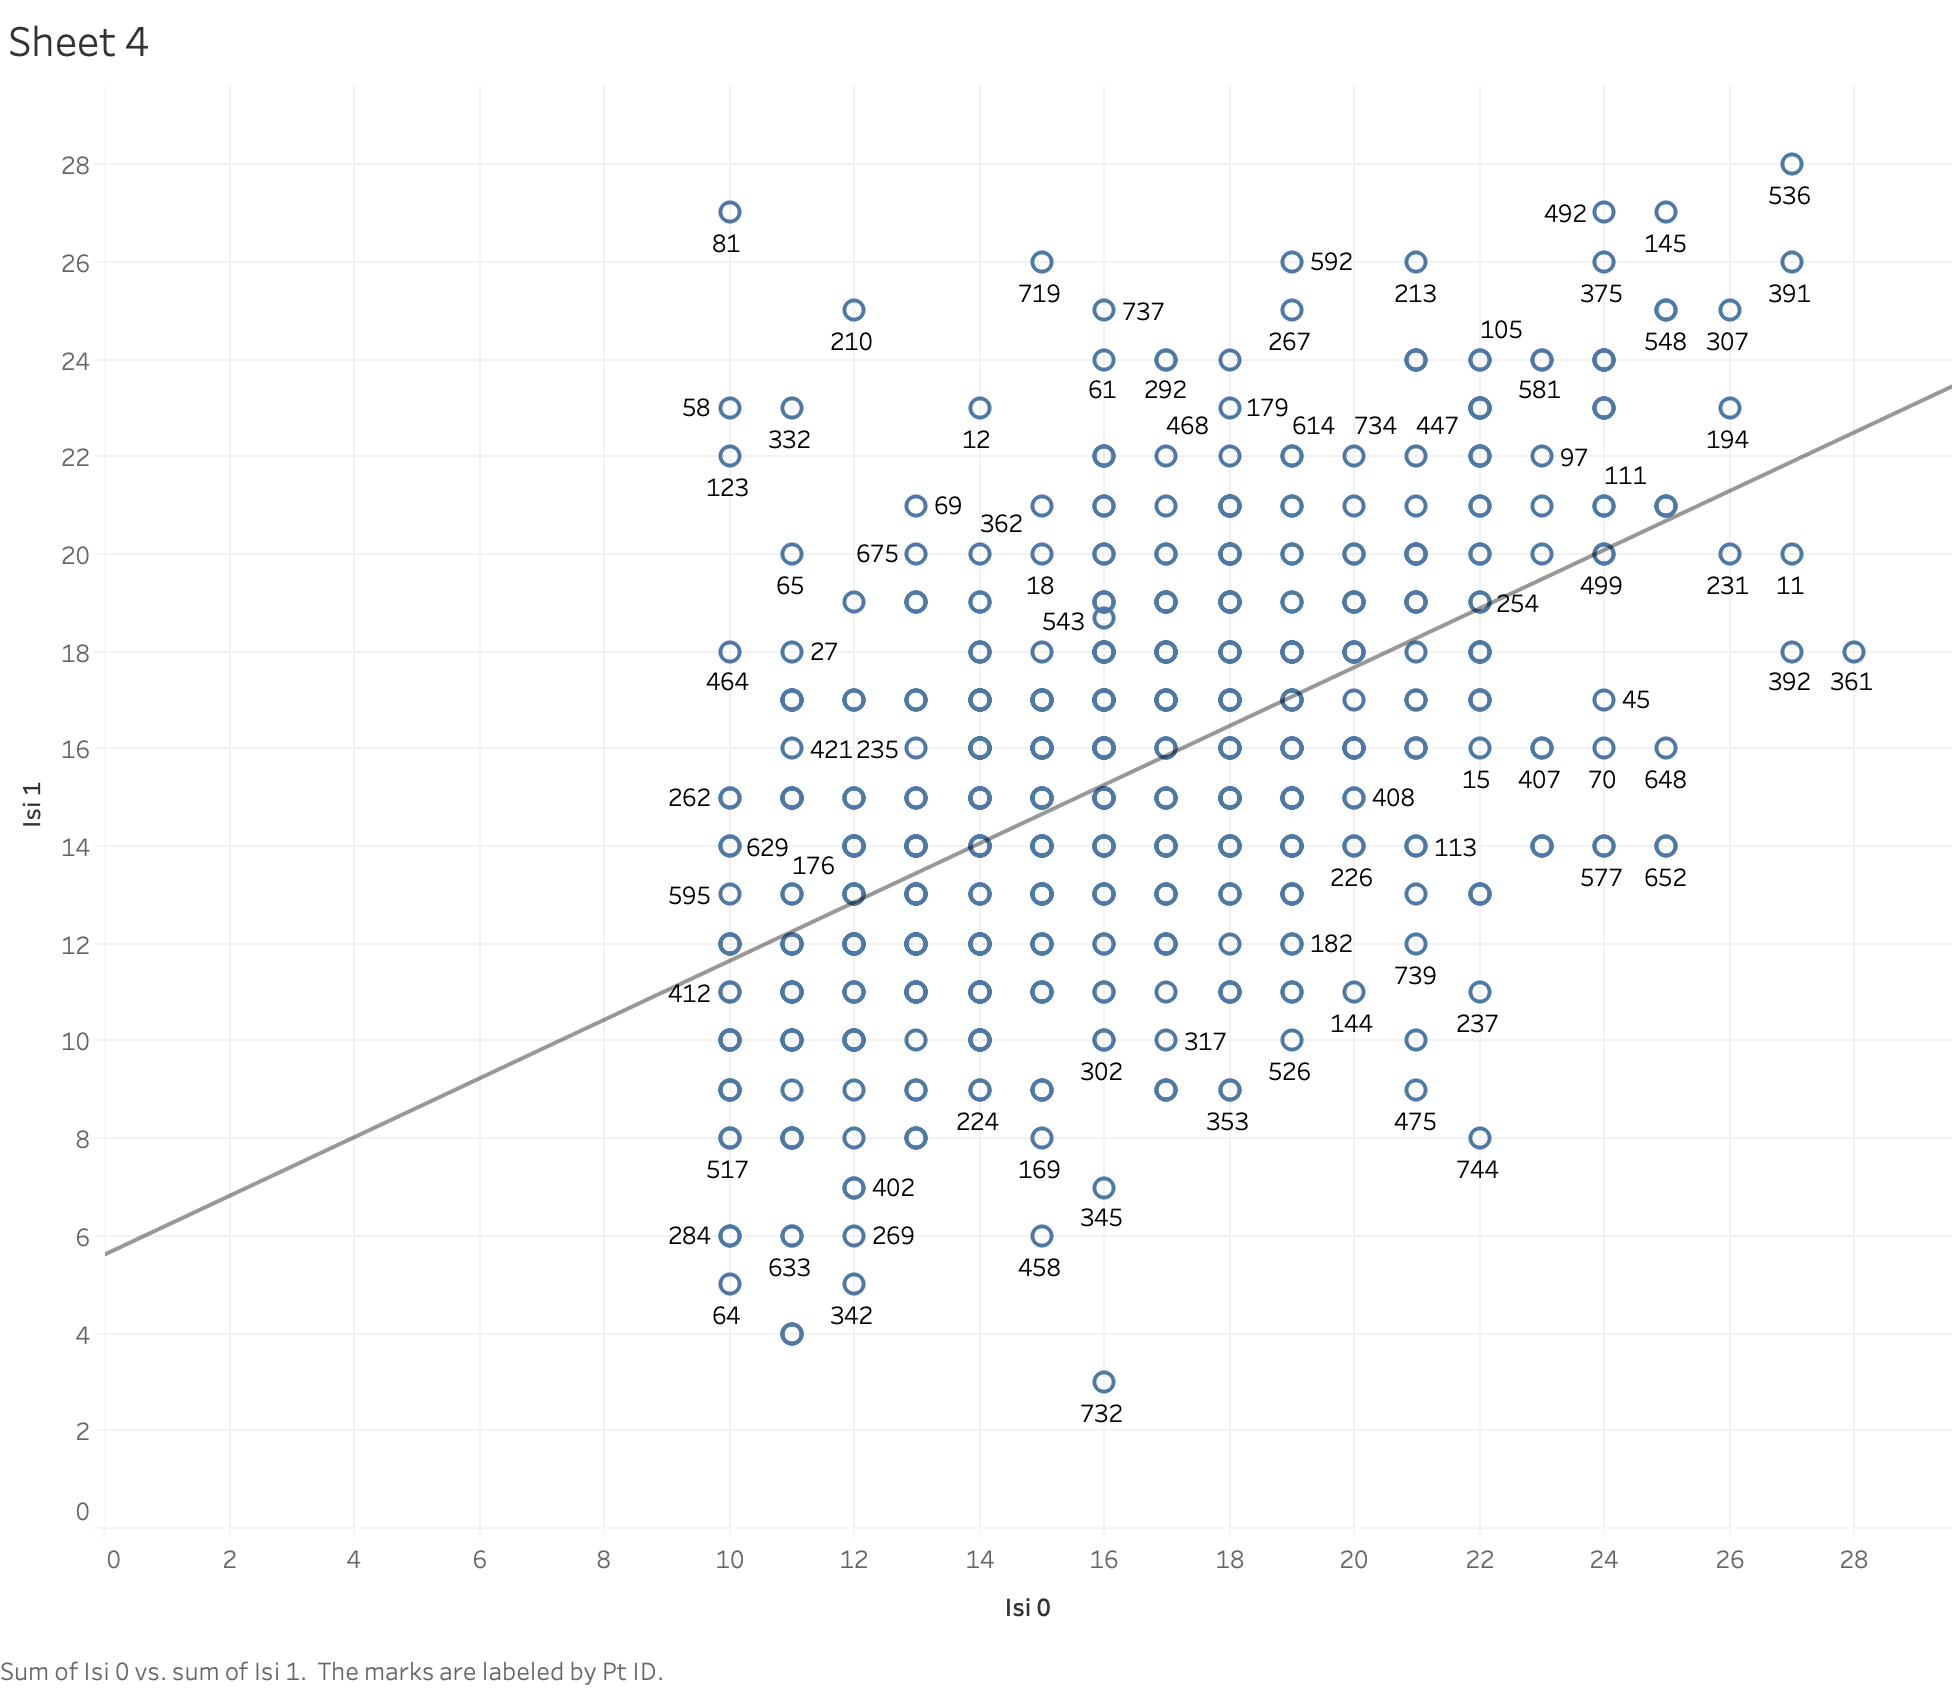

In [35]:
#ISI 10-18 = moderate, 19-28 = severe
#df_new[df_new['ISI_1']>=10.0]
df_new[(df_new.ISI_1 >=10.0) & (df_new.ISI_1 <=18.0)].count()

ptID     432
ISI_0    432
ISI_1    432
dtype: int64

In [36]:
df_new[(df_new.ISI_1 >=19.0) & (df_new.ISI_1 <=28.0)].count()

ptID     140
ISI_0    140
ISI_1    140
dtype: int64

In [37]:
df_new['ISI_0'].mean()

16.323101777059772

In [38]:
df_new['ISI_1'].mean()

15.453419493807218

# Missing Value Imputation

# MICE Imputation

In [19]:
# scikit-learn Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer(max_iter=10, random_state=0,min_value=0)
ii.fit(train_set)
ii_train_set = ii.transform(train_set)
ii_train_set = pd.DataFrame(ii_train_set).round(2)
ii_train_set.columns = list(train_set.columns.values)
#ii_train_set.to_csv("ii_train_set.csv")

# KNN Imputation

In [20]:
from fancyimpute import KNN

knn_imputer = KNN()
knn_train_set = knn_imputer.fit_transform(train_set)
knn_train_set = pd.DataFrame(knn_train_set).round(2)
knn_train_set.columns = list(train_set.columns.values)
#knn_train_set.sort_values('PtID'z)
#knn_train_set.to_csv("knn_train_set.csv")
knn_train_set

Imputing row 1/615 with 0 missing, elapsed time: 0.101
Imputing row 101/615 with 0 missing, elapsed time: 0.103
Imputing row 201/615 with 0 missing, elapsed time: 0.104
Imputing row 301/615 with 0 missing, elapsed time: 0.104
Imputing row 401/615 with 0 missing, elapsed time: 0.104
Imputing row 501/615 with 0 missing, elapsed time: 0.105
Imputing row 601/615 with 0 missing, elapsed time: 0.105


,PtID,Pain,Fatigue,ShortBreath,Weakness,Nausea,Vomiting,Anxiety,Depression,ProblemRemember,...,Trial_AVG,Distance,VO2,cstage,cecog_0,cecog_1,cecog_2 or Greater,Race,Ethnic,cDXCode
0,10.0,8.0,8.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,...,25.33,1371.25,10.47,3.0,1.0,0.0,0.0,1.0,1.0,0.0
1,15.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,...,12.25,1445.25,10.84,2.0,1.0,0.0,0.0,1.0,1.0,1.0
2,36.0,8.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,5.0,...,22.67,1009.08,8.63,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,42.0,1.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,20.67,1609.67,11.68,3.0,1.0,0.0,0.0,1.0,1.0,1.0
4,1.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,30.67,1434.67,10.79,2.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,717.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,...,18.25,1054.00,8.85,2.0,0.0,1.0,0.0,1.0,1.0,0.0
611,724.0,4.0,6.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,...,47.33,1620.00,11.73,3.0,1.0,0.0,0.0,0.0,1.0,0.0
612,732.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,20.00,919.00,8.17,1.0,0.0,1.0,0.0,0.0,1.0,1.0
613,660.0,10.0,10.0,10.0,10.0,10.0,0.0,8.0,6.0,9.0,...,35.75,1880.00,13.05,2.0,0.0,1.0,0.0,1.0,1.0,0.0


## Clustering
### ISI 10-18 Moderate, 18-28 Severe

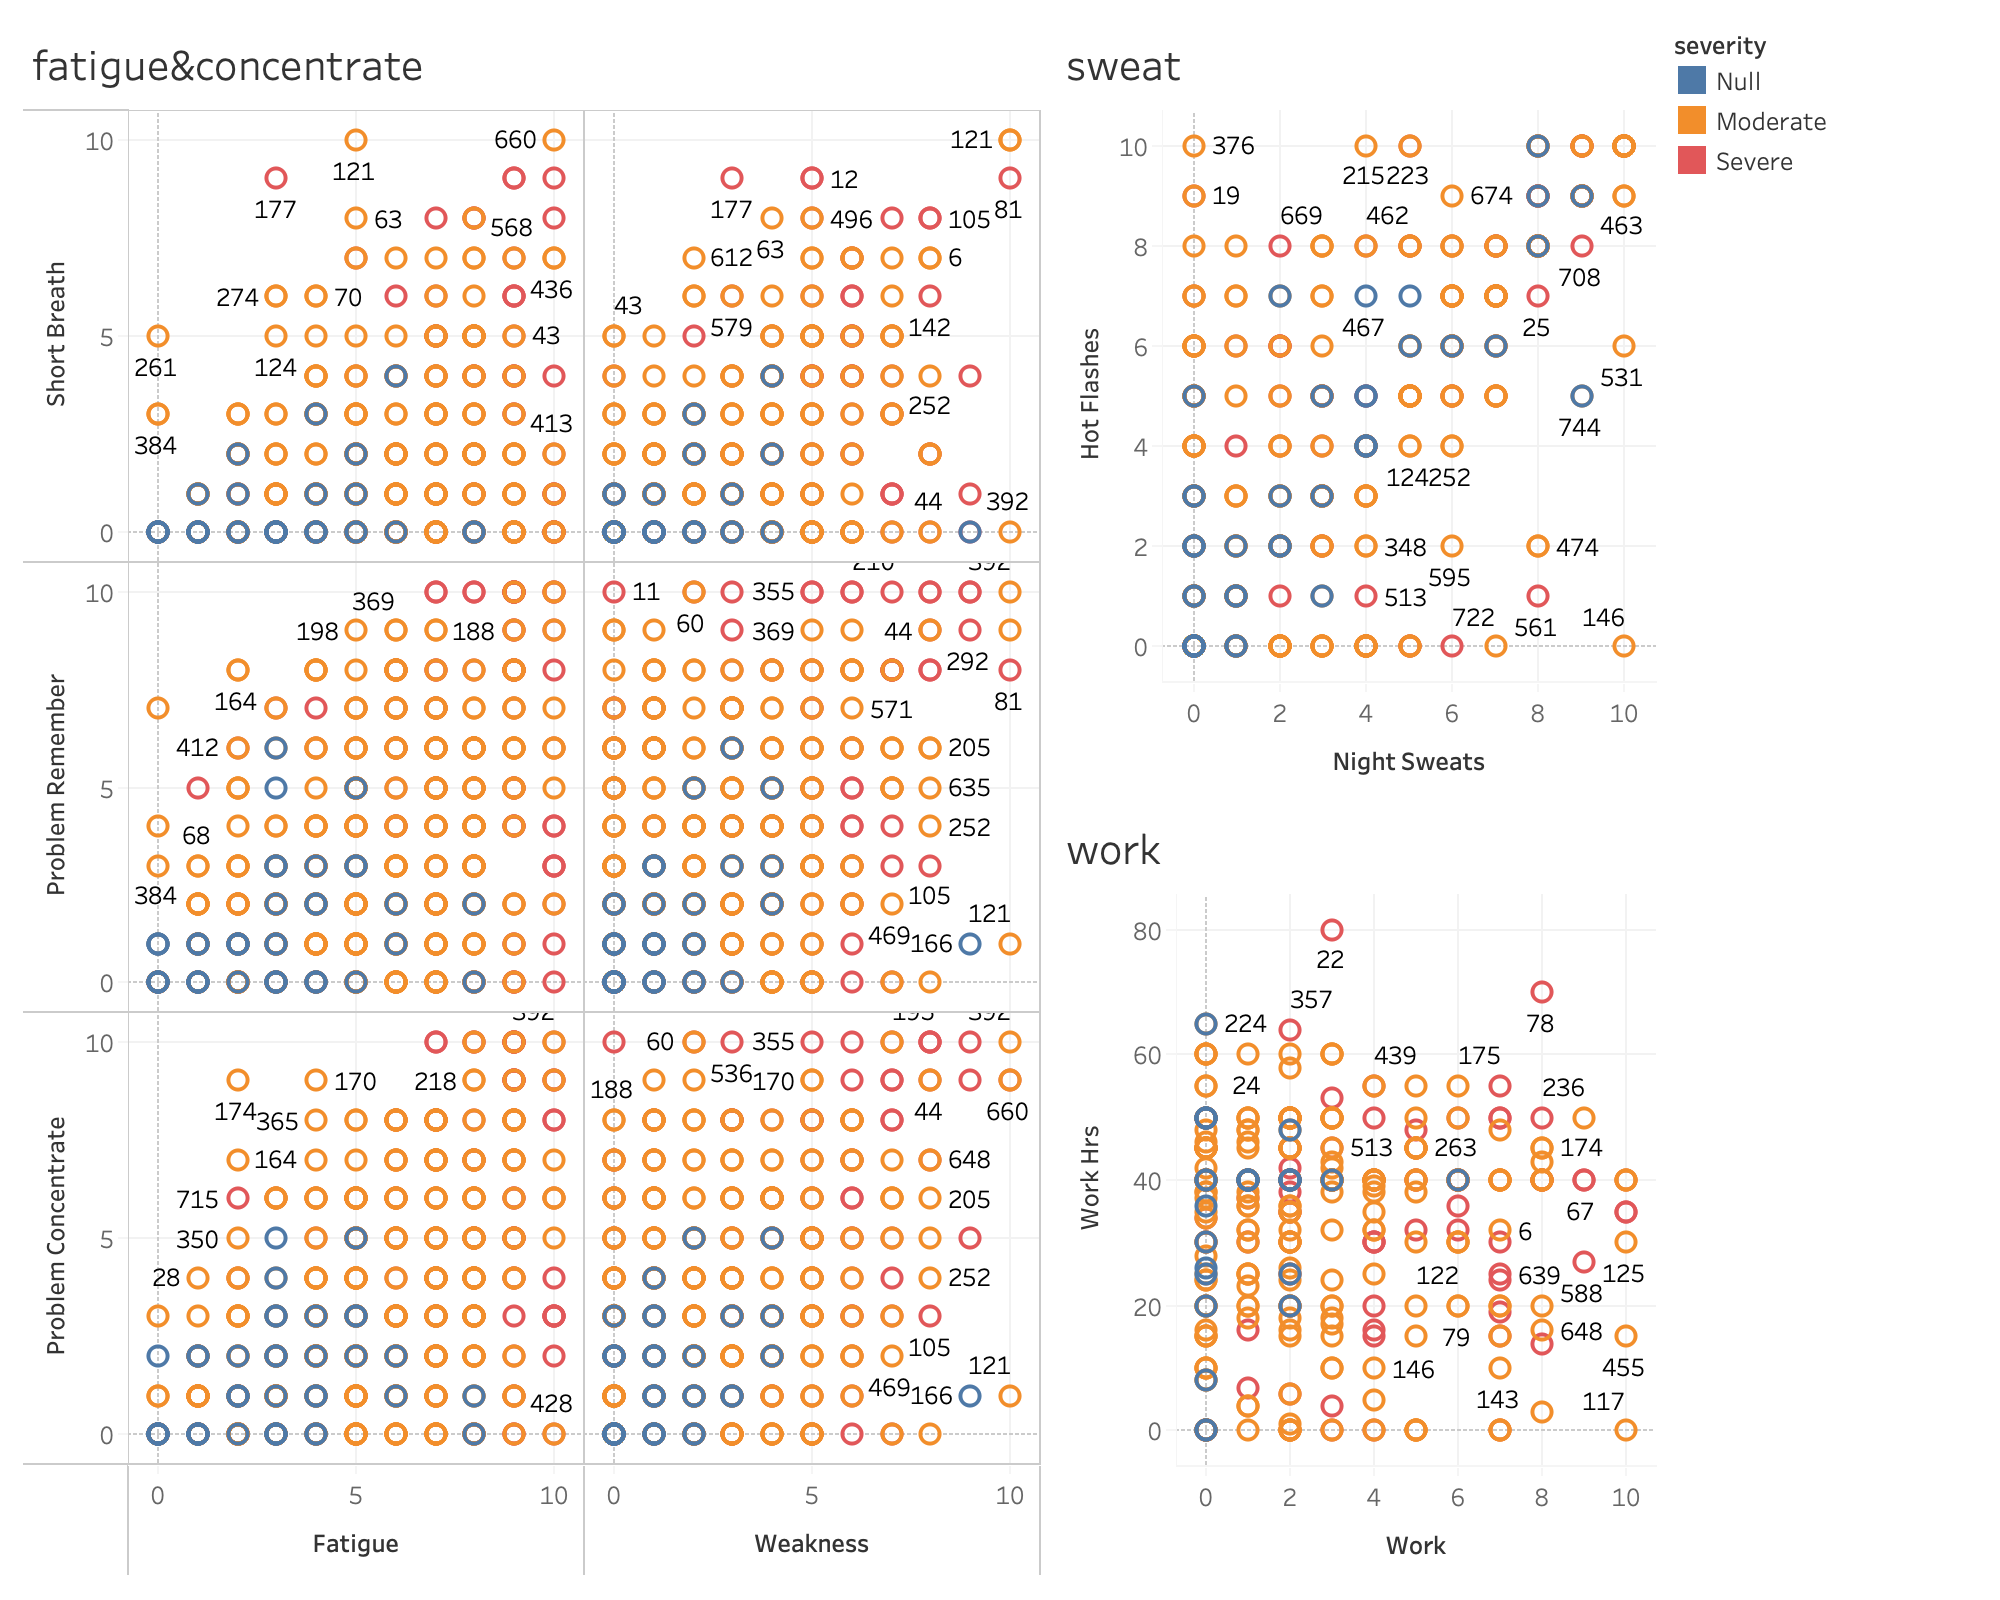

# Features selection

# Feature selection using Lasso:
1. features' coefficient not 0: Fatigue, Depression, LackAppetite, HotFlashes, NightSweats, ADL, Relations, Walking, Exercise_x, QoL, Employed, WorkHrs, Distance. 
2. All other features' coefficients are 0

(461, 45) (154, 45)


Text(0.5, 1.0, 'LASSO coefficieents vs. alpha')

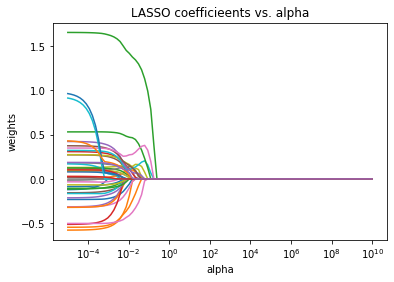

In [21]:
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score  

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

y = knn_train_set['ISI']
X = knn_train_set.drop(['ISI'], axis = 1).astype('float64')
alphas = 10**np.linspace(10,-5,100)*0.5
X_train, X_test , y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape,X_test.shape)

#X_train.to_csv('/Users/fanyangxin/Box/YOCAS Insomnia/Data/final_train.csv')
#X_test.to_csv('/Users/fanyangxin/Box/YOCAS Insomnia/Data/final_test.csv')
#knn_train_set.to_csv('/Users/fanyangxin/Box/YOCAS Insomnia/Data/final_data.csv')

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficieents vs. alpha')

In [22]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 1000, normalize = True)
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test.shape[0])-1)/((X_test.shape[0])-(X_test.shape[1])-1))))

Test RMSE is: 3.28136224305549
Test MAE is: 2.613898472534204
R2: 0.23199619832033724
Adjusted R2: -0.08800538571285554


In [23]:
coefficients = pd.Series(lassocv.coef_, index=X.columns)
coefficients.to_csv("Lasso_coefficients_new")
print("Optimal alpha is: {}".format(lassocv.alpha_))

Optimal alpha is: 0.012962376238387053


# Baseline Linear Regression

In [24]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


y = knn_train_set['ISI']
X = knn_train_set.drop(['ISI'], axis = 1).astype('float64')
X_train, X_test , y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test.shape[0])-1)/((X_test.shape[0])-(X_test.shape[1])-1))))

Test RMSE is: 3.6252111793533817
Test MAE is: 2.795890185147253
R2: 0.06260714731348482
Adjusted R2: -0.32797320797256324


# Feature selection using random forests:
Top 10 most important features: Fatigue, QOL, ADL, Distance, Relations, Physical_Activity, Trial_AVG, Mood, BMI, Exercise_X

# Random Forests Tuning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10, 15, 20],
    'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf = RandomForestRegressor() #creating base model

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 3, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 200, 400,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 400, 600,
                                                         800, 1000, 1200, 1400,
                                                         1600, 1800, 2000]},
                   random_state=42, verbose=2)

In [16]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=5, n_estimators=1400)

# Random Forest Best Fit

Test RMSE is: 3.2776443515587053
Test MAE is: 2.600942312257629


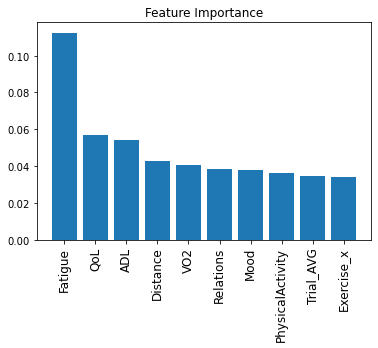

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3, min_samples_split=5,
                      n_estimators=1400,random_state=42)


y = knn_train_set['ISI']
X = knn_train_set.drop(['ISI'], axis = 1).astype('float64')
X_train, X_test , y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
model.fit(X_train, y_train)
print("Test RMSE is: {}".format(mean_squared_error(y_test, model.predict(X_test), squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, model.predict(X_test))))

importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.bar(range(10), importances[indices][0:10])
# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90, fontsize = 12)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

# Dimensionality Reduction

## PCA for clustering of same categories of features (symptoms etc)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets


y = ii_train_set['ISI']
xset = ii_train_set.drop(['ISI'], axis = 1)
X = xset[['Pain', 'Fatigue', 'ShortBreath',
       'Weakness', 'Nausea', 'Vomiting','Anxiety', 'Depression', 'ProblemRemember', 'ProblemConcentrate',
       'LackAppetite', 'WeightLoss', 'WeightGain', 'ChangeUrination',
       'Diarrhea', 'Numbness', 'HotFlashes', 'NightSweats']].astype('float64')


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape,X_test.shape)

pca = PCA(n_components = 3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


(461, 18) (154, 18)


The test set should ideally not be preprocessed with the training data. This will ensure no 'peeking ahead'. 
Train data should be preprocessed separately and once the model is created we can apply the same preprocessing 
parameters used for the train set, onto the test set as though the test set didn't exist before.

Explained variance ratio: [0.31041996 0.09512845 0.07959772]
pc1                     Features Importance
ProblemConcentrate             0.327942
ProblemRemember                0.316837
Weakness                       0.312376
Fatigue                        0.291678
Depression                     0.286271
Anxiety                        0.274214
LackAppetite                   0.270249
Pain                           0.244428
ShortBreath                    0.229383
Numbness                       0.226817
Nausea                         0.224242
NightSweats                    0.188281
WeightLoss                     0.176613
WeightGain                     0.171016
HotFlashes                     0.158735
ChangeUrination                0.150382
Diarrhea                       0.123433
Vomiting                       0.078783


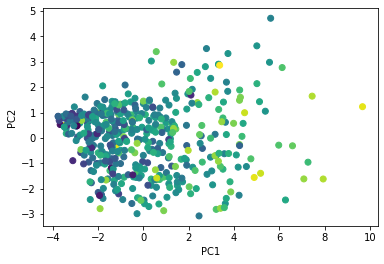

In [46]:
evr = pca.explained_variance_ratio_.astype('float64')
pc1 = abs( pca.components_[0]).astype("float64")
pc1 = pd.DataFrame(pc1, index = X.columns)
pc1.columns = ["Features Importance"]
np.set_printoptions(suppress=True)
print("Explained variance ratio: {}".format(evr))
print("pc1 {}".format(pc1.sort_values(by=['Features Importance'],ascending = False)))

plt.scatter(X_train[:,0],X_train[:,1],c = y_train)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.show()

## symptoms interfered

In [27]:
y = ii_train_set['ISI']
xset = ii_train_set.drop(['ISI'], axis = 1)
X = xset[['ADL', 'Mood',
       'Work', 'Relations', 'PhysicalActivity', 'Walking', 'Exercise_x', 'QoL']].astype('float64')


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape,X_test.shape)

pca = PCA(n_components = 3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


(461, 8) (154, 8)


NameError: name 'PCA' is not defined

Explained variance ratio: [0.65971234 0.11483701 0.05039991]
pc1                   Features Importance
PhysicalActivity             0.383265
ADL                          0.381501
QoL                          0.373995
Work                         0.359975
Mood                         0.349666
Relations                    0.339383
Exercise_x                   0.328553
Walking                      0.304495


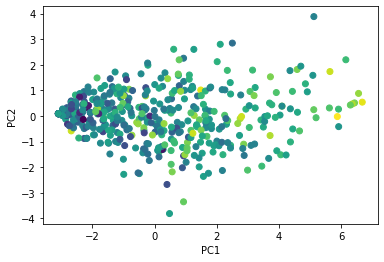

In [16]:
evr = pca.explained_variance_ratio_.astype('float64')
pc1 = abs( pca.components_[0]).astype("float64")
pc1 = pd.DataFrame(pc1, index = X.columns)
pc1.columns = ["Features Importance"]
np.set_printoptions(suppress=True)
print("Explained variance ratio: {}".format(evr))
print("pc1 {}".format(pc1.sort_values(by=['Features Importance'],ascending = False)))

plt.scatter(X_train[:,0],X_train[:,1],c = y_train)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.show()

# Neural Network tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD

def create_model(learn_rate=0.01, momentum=0):
    nn = Sequential()
    nn.add(Dense(3, input_dim=44, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(1))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    nn.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return nn

# create model
nn = KerasRegressor(build_fn=create_model, verbose=0)

param_dist = {
 'batch_size': [1, 2, 5, 10, 20, 30, 50, 100, 150, 200],
 'epochs' : [5, 10, 25, 50, 75, 100],
 'learn_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
 'momentum' : [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]}

RS = RandomizedSearchCV(nn, param_distributions=param_dist, cv=5, 
n_iter = 3, n_jobs=-1, random_state=42)

RS.fit(X_train, y_train)
RS.best_params_

ValueError: in user code:

    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 43 but received input with shape (None, 44)


# Neural network best fit

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
np.random.seed(1) 

def create_model(learn_rate=0.2, momentum=0.2):
    nn = Sequential()
    nn.add(Dense(3, input_dim=44, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(3, activation='relu'))
    nn.add(Dense(1))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    nn.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return nn

y = knn_train_set['ISI']
X = knn_train_set.drop(['ISI'], axis = 1).astype('float64')
X_train, X_test , y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

nn = KerasRegressor(build_fn=create_model, verbose=0)
nn.fit(X_train, y_train, epochs=5, batch_size=150,shuffle=False)
print("Test RMSE is: {}".format(mean_squared_error(y_test, nn.predict(X_test), squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, nn.predict(X_test))))
print('R2: {}'.format(r2_score(y_test,nn.predict(X_test))))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, nn.predict(X_test)))*(((X_test.shape[0])-1)/((X_test.shape[0])-(X_test.shape[1])-1))))


Test RMSE is: 3.893087412868653
Test MAE is: 3.2247898795387964
R2: -0.08104389133724643
Adjusted R2: -0.5174285814183368


In [53]:
print("Train RMSE is: {}".format(mean_squared_error(y_train, nn.predict(X_train), squared = False)))

Train RMSE is: 4.5593678978946794


# AdaBoost tuning

In [55]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100, 250, 500, 1000],
 'learning_rate' : [0.005,0.01,0.05,0.1,0.3,0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

rs = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=5,
 n_iter = 2,
 n_jobs=-1,
 random_state=42)

rs.fit(X_train, y_train)
rs.best_params_

{'n_estimators': 250, 'loss': 'square', 'learning_rate': 0.01}

# AdaBoost best fit

In [58]:
ada_model = AdaBoostRegressor(n_estimators=250, loss='square', learning_rate=0.01,random_state=42)
ada_model.fit(X_train,y_train)

y_pred = ada_model.predict(X_test)

print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test.shape[0])-1)/((X_test.shape[0])-(X_test.shape[1])-1))))

Test RMSE is: 3.323759246823981
Test MAE is: 2.6340670256606993
R2: 0.21202192480634585
Adjusted R2: -0.10606096793237696


# XGBoost tuning (Four types)

# 1. keep all 
# 2. top 20 most important variables selected by optimal XGBoost full model
# 3. Select features from Lasso + Key social/demographics 
# 4. Select features from Lasso

In [25]:
#lasso coefficients != 0
lasso_predictors = [['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

demo = [['regage','Race','Ethnic','Gender','MaritalStatus','Education','BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)

In [63]:
def XGB_tuning(X_train,y_train,X_test,y_test):

    param_tuning = {
        'learning_rate': [0.005, 0.01, 0.05, 0.1],
        'max_depth': [1, 3, 5],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.3, 0.5, 0.7],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'n_estimators' : [250, 500, 750, 1000],
        'objective': ['reg:squarederror']}

    xgb_model = XGBRegressor()
    
    gsearch = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,                        
                        #scoring = 'neg_mean_absolute_error', #MAE
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)
    
    gsearch.fit(X_train,y_train)
    return gsearch.best_params_

# Keep all 

In [64]:
best_params = XGB_tuning(X_train,y_train,X_test,y_test)
best_params

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 52.6min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 1,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.3}

Test RMSE is: 3.2526993036914713
Test MAE is: 2.5329548166943834
R2: 0.2453547373149365
Adjusted R2: -0.06908078880384005


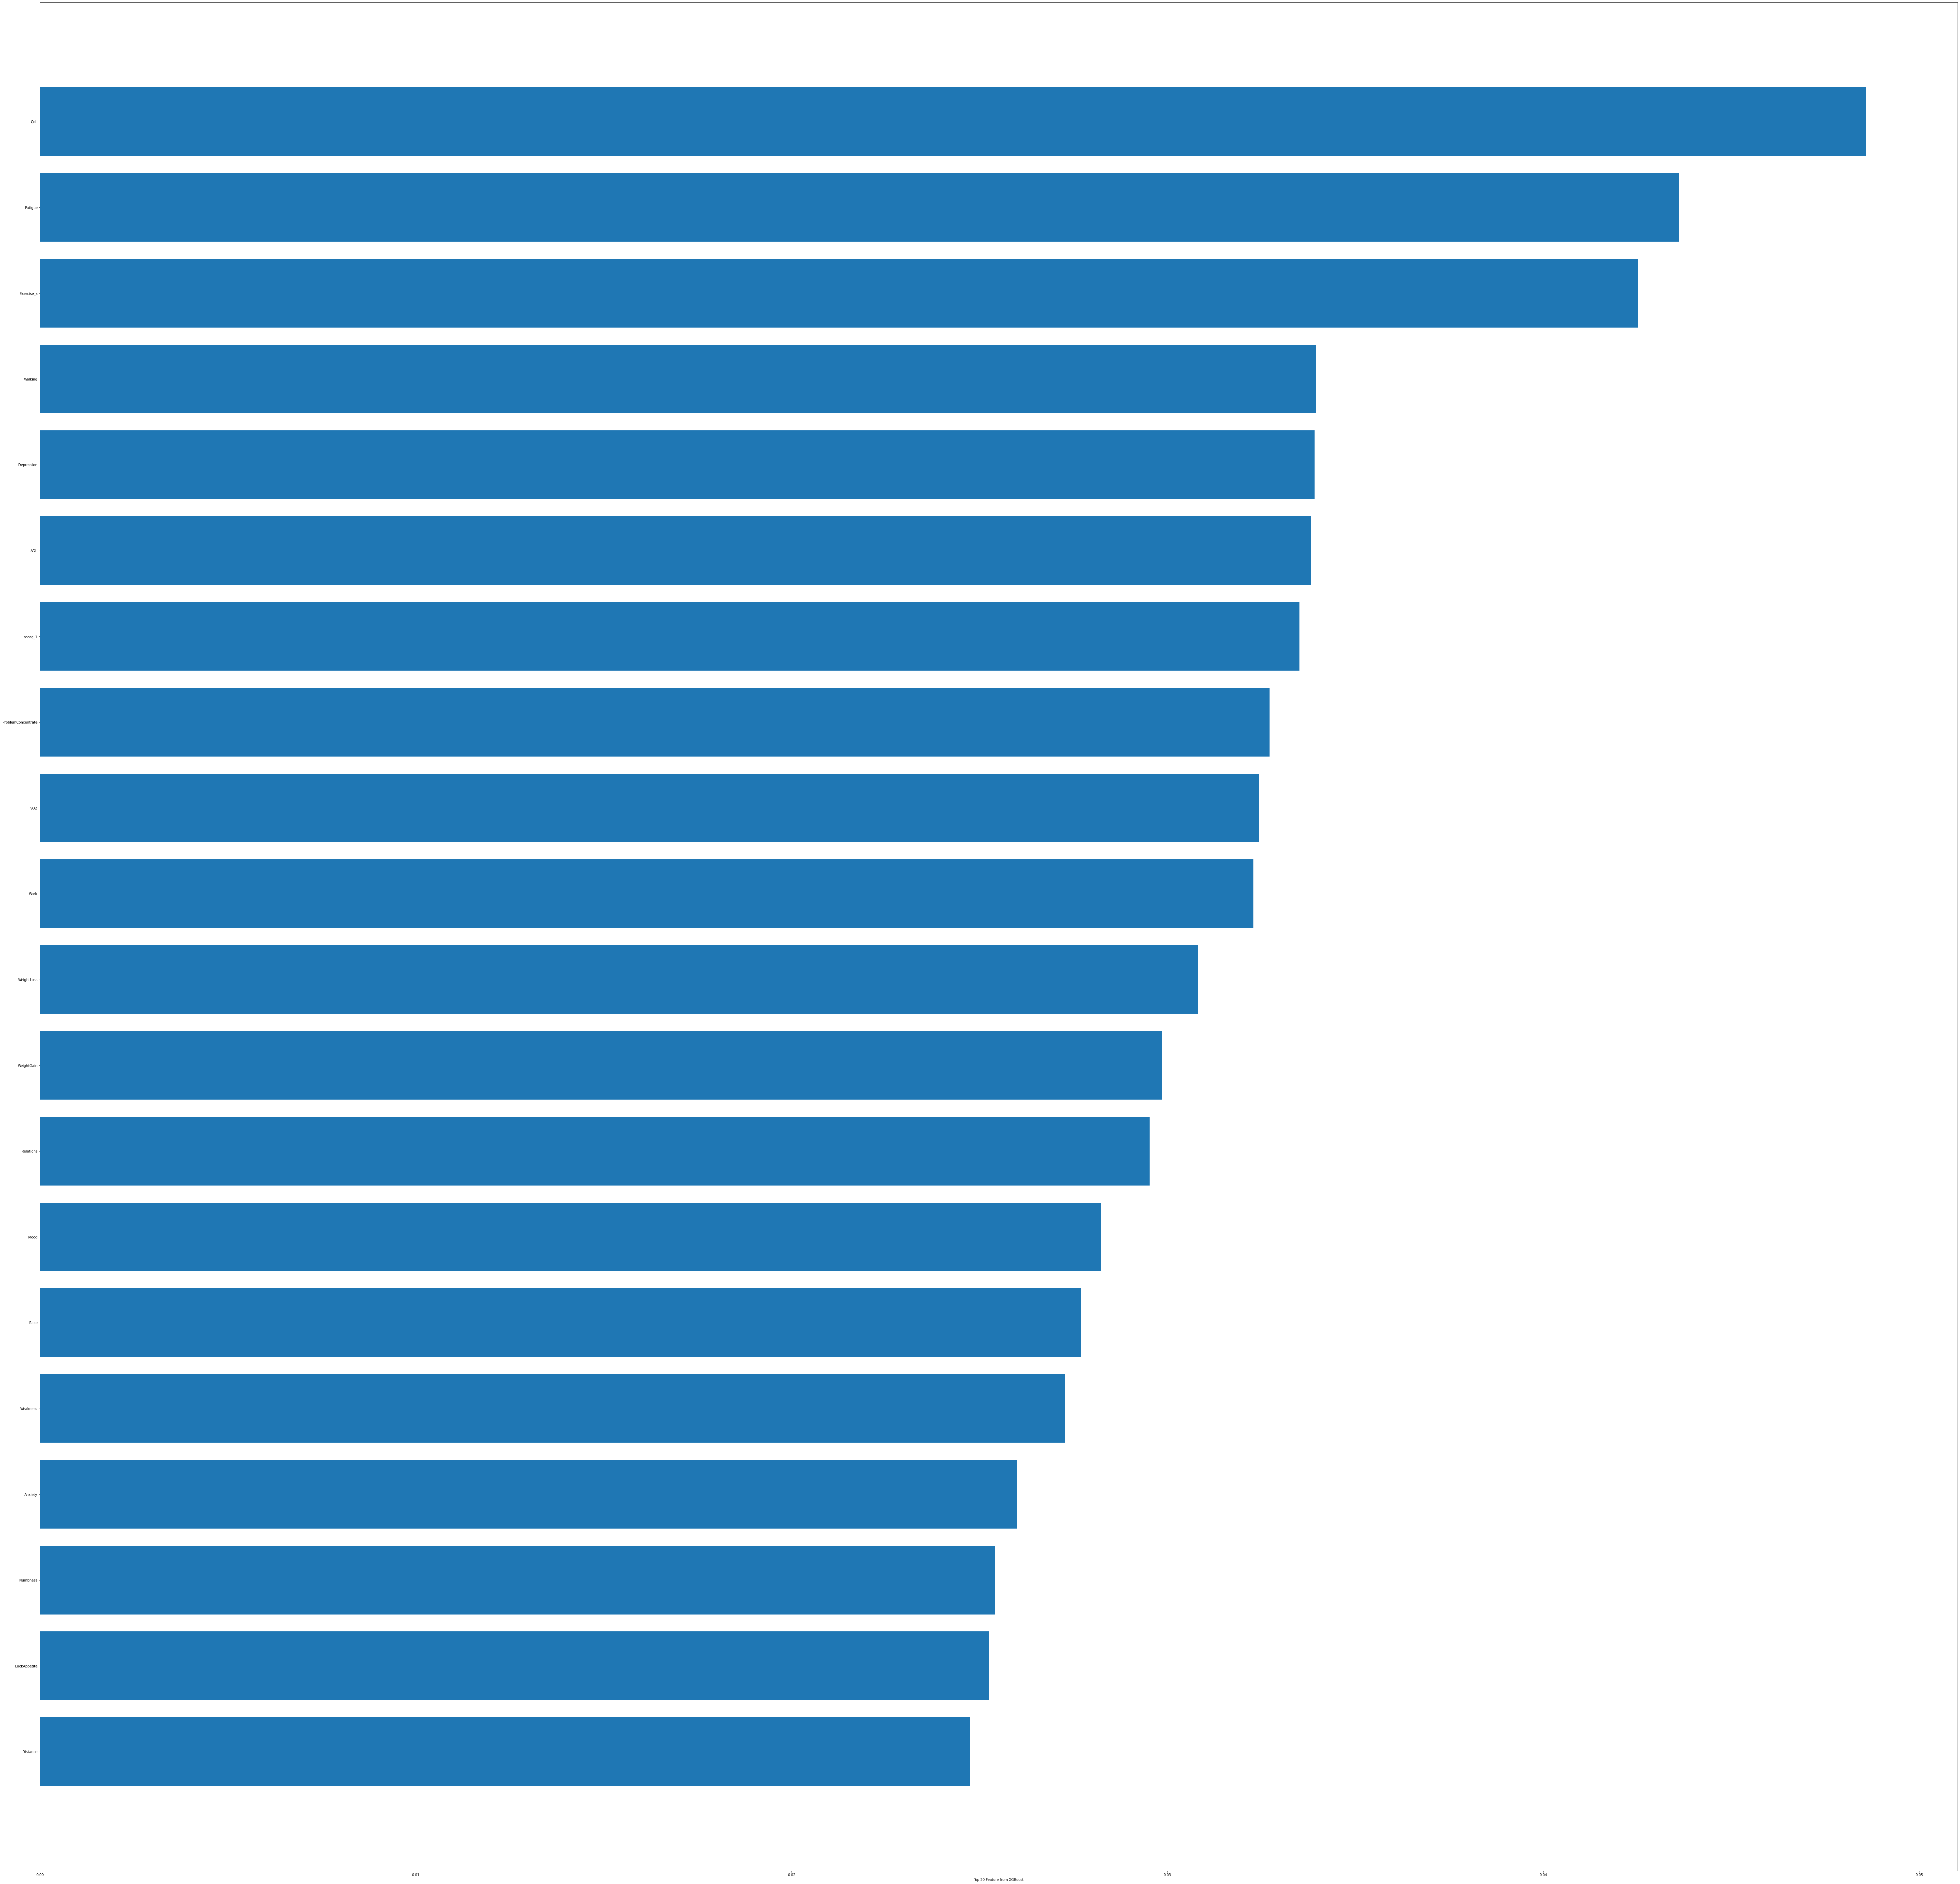

In [27]:
from matplotlib import pyplot as plt
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 1,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.3,
        random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgb_model.predict(X_test)

print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))

#adjusted r2
from sklearn.metrics import r2_score  
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test.shape[0])-1)/((X_test.shape[0])-(X_test.shape[1])-1))))

fig, ax = plt.subplots(figsize=(100,100))
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx][25:46], xgb_model.feature_importances_[sorted_idx][25:46])
plt.xlabel("Top 20 Feature from XGBoost")
plt.rc('font', size=150)  

In [28]:
xgb_model.feature_importances_[sorted_idx]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00916432, 0.01195822, 0.018266  ,
       0.01836288, 0.01882283, 0.01888742, 0.02008524, 0.02036133,
       0.02055932, 0.02058451, 0.02082314, 0.02083132, 0.02159401,
       0.02241524, 0.02257804, 0.02354427, 0.02427666, 0.02468685,
       0.02474904, 0.02524312, 0.02542181, 0.02600201, 0.02727511,
       0.02769628, 0.02822725, 0.02952681, 0.02986681, 0.03081853,
       0.03229032, 0.03243309, 0.03271683, 0.0335098 , 0.03381487,
       0.03391096, 0.03395876, 0.04253008, 0.04361179, 0.04859516],
      dtype=float32)

# Top 20 most important variables

In [73]:
top_20_features = X_train.columns.values[sorted_idx][::-1][:20,]
best_params = XGB_tuning(X_train[top_20_features],y_train,X_test[top_20_features],y_test)
best_params

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 60.5min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.3}

In [29]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score   
import shap


top_20_features = X_train.columns.values[sorted_idx][::-1][:20,]
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 1,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.3,
        random_state=42)

xgb_model.fit(X_train[top_20_features], y_train, early_stopping_rounds=5, eval_set=[(X_test[top_20_features], y_test)], verbose=False)

y_pred = xgb_model.predict(X_test[top_20_features])

print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test[top_20_features].shape[0])-1)/((X_test[top_20_features].shape[0])-(X_test[top_20_features].shape[1])-1))))

Test RMSE is: 3.257029955322257
Test MAE is: 2.538201208238478
R2: 0.24334392659185689
Adjusted R2: 0.12956105841018128


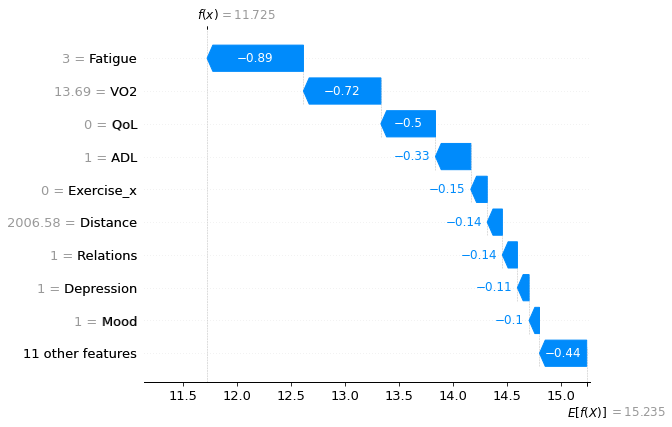

In [38]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train[top_20_features])
X_display,y_display = shap.datasets.nhanesi(display=True)

# visualize the first prediction's explanation E[f(x)] is train AVG_ISI
shap.plots.waterfall(shap_values[0])

In [34]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

invalid value encountered in true_divide
invalid value encountered in true_divide


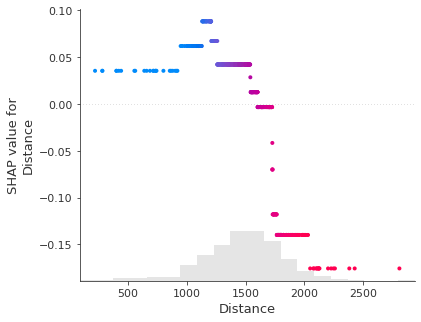

In [45]:
shap.plots.scatter(shap_values[:,"Fatigue"], color=shap_values)

In [35]:
# visualize all the training set predictions
display(shap.force_plot(explainer.expected_value, shap_values.values))

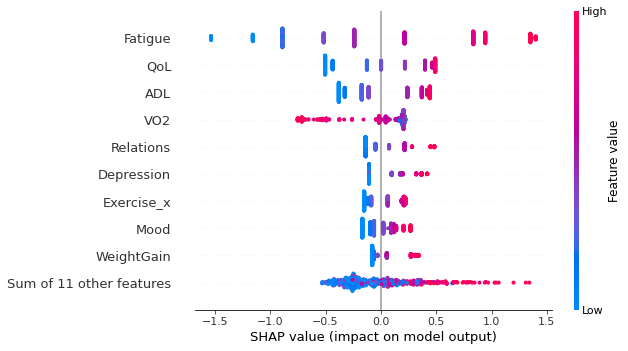

In [36]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

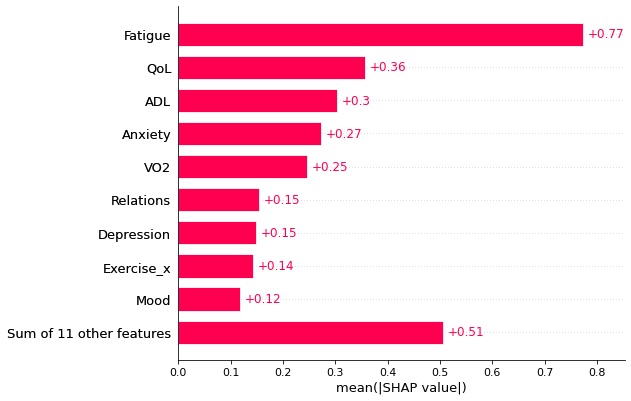

In [37]:
shap.plots.bar(shap_values)

In [ ]:
shap.dependence_plot("Distance", shap_values, X, display_features=X_display, show=False)
pl.xlim(2,15)
pl.show()

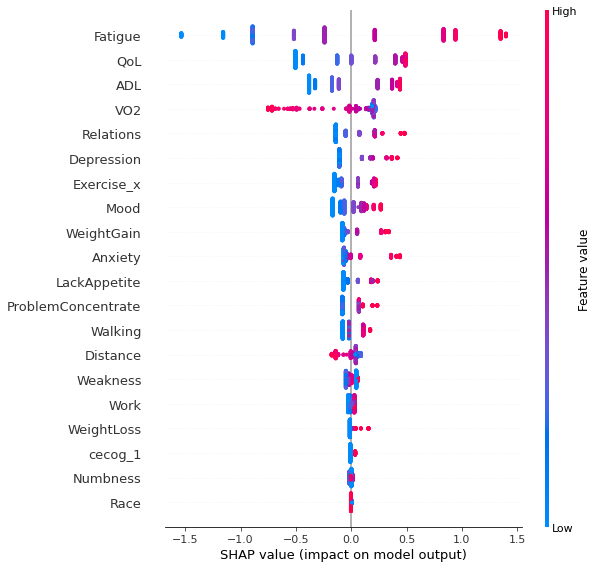

In [44]:
shap.summary_plot(shap_values, X_train[top_20_features])

More links:
    1. https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html
    2. https://github.com/slundberg/shap


In [23]:
#adjusted r2
from sklearn.metrics import r2_score   
  
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test.shape[0])-1)/((X_test.shape[0])-(X_test.shape[1])-1))))

Adjusted R2: -0.0719294373282029


https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning

# Lasso + Key social/demographics

In [81]:
lasso_SD = ['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']

best_params = XGB_tuning(X_train[lasso_SD],y_train,X_test[lasso_SD],y_test)
best_params
#demo = [['regage','Race','Ethnic','Gender','MaritalStatus','Education','BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 48.3min finished


{'colsample_bytree': 0.3,
 'learning_rate': 0.005,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'objective': 'reg:squarederror',
 'subsample': 0.3}

In [91]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score   

xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.3,
        learning_rate = 0.005,
        max_depth = 1,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.3,
        random_state=42)

xgb_model.fit(X_train[lasso_SD], y_train, early_stopping_rounds=5, eval_set=[(X_test[lasso_SD], y_test)], verbose=False)

y_pred = xgb_model.predict(X_test[lasso_SD])

print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test[lasso_SD].shape[0])-1)/((X_test[lasso_SD].shape[0])-(X_test[lasso_SD].shape[1])-1))))

Test RMSE is: 3.2982499337975884
Test MAE is: 2.5731779507228305
R2: 0.22407071822405955
Adjusted R2: 0.08679092221754703


# Lasso

In [82]:
lasso = ['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']

best_params = XGB_tuning(X_train[lasso],y_train,X_test[lasso],y_test)
best_params

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 59.3min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.005,
 'max_depth': 1,
 'min_child_weight': 3,
 'n_estimators': 1000,
 'objective': 'reg:squarederror',
 'subsample': 0.3}

In [92]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score   

xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.3,
        learning_rate = 0.005,
        max_depth = 1,
        min_child_weight = 3,
        n_estimators = 1000,
        subsample = 0.3,
        random_state=42)

xgb_model.fit(X_train[lasso], y_train, early_stopping_rounds=5, eval_set=[(X_test[lasso], y_test)], verbose=False)

y_pred = xgb_model.predict(X_test[lasso])

print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred)))
print('R2: {}'.format(r2_score(y_test,y_pred)))
print('Adjusted R2: {}'.format(1-(1-r2_score(y_test, y_pred))*(((X_test[lasso].shape[0])-1)/((X_test[lasso].shape[0])-(X_test[lasso].shape[1])-1))))

Test RMSE is: 3.284377251146016
Test MAE is: 2.571850231715611
R2: 0.23058422286949942
Adjusted R2: 0.165102029071159


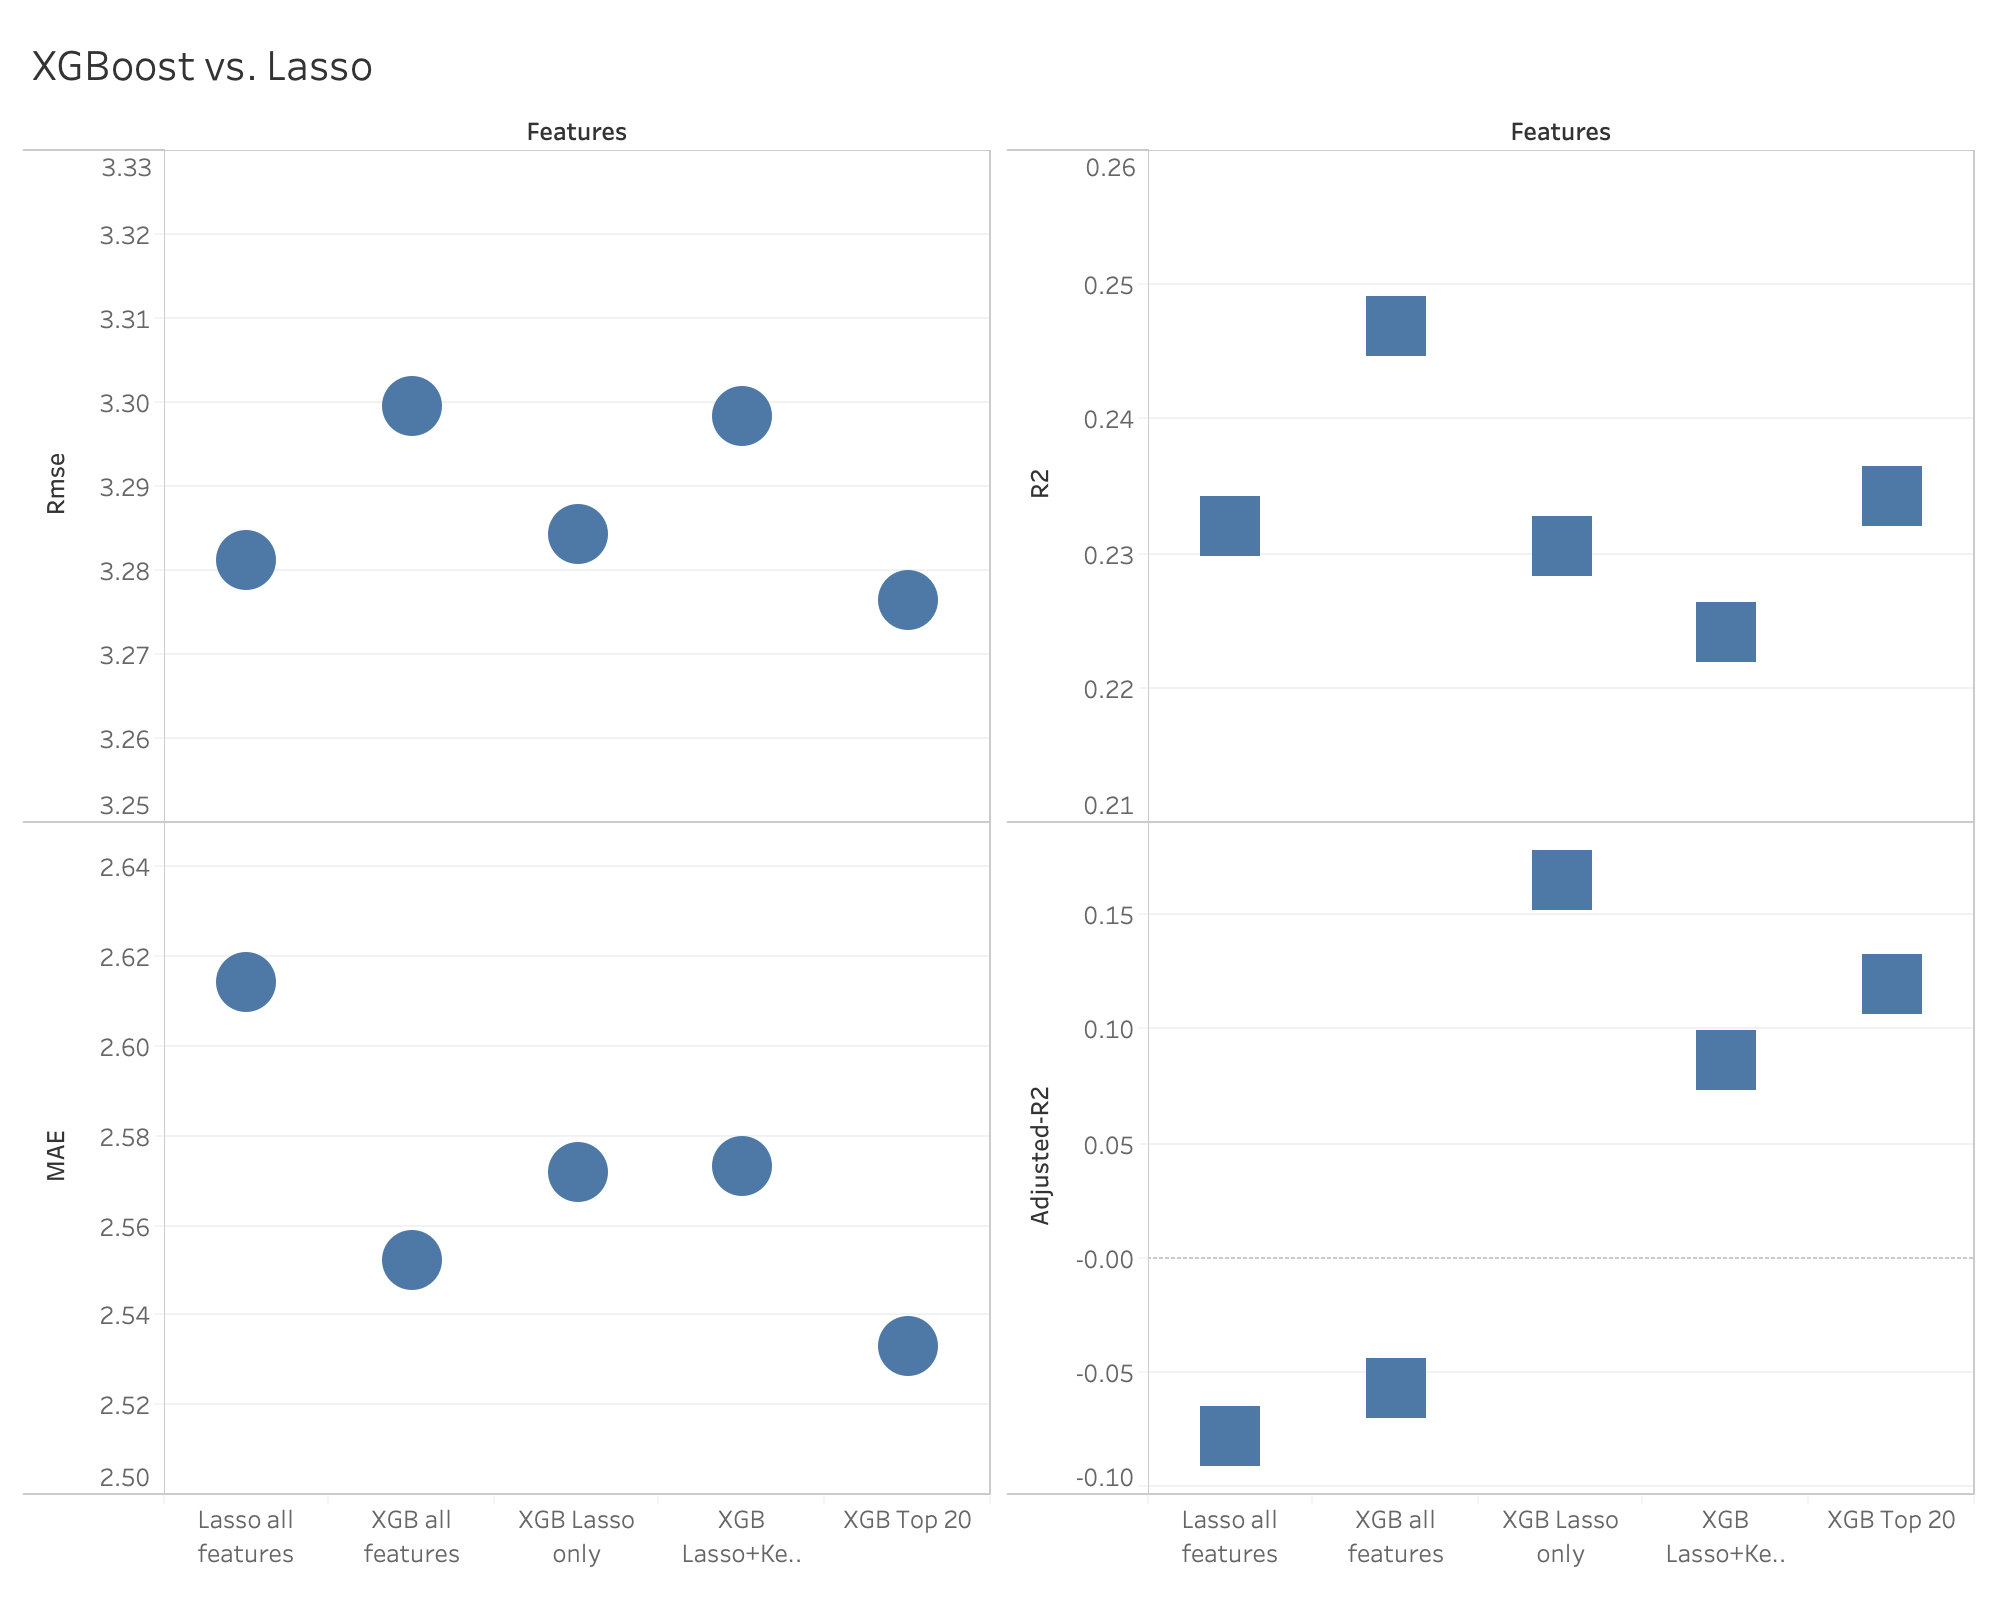

# RFE Recursively Feature Selection
### Linear SVM

In [8]:
from numpy import mean
from numpy import std

from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

y = ii_train_set['ISI']
X = ii_train_set.drop(['ISI'], axis = 1).astype('float64')
xset = ii_train_set.drop(['ISI'], axis = 1)

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
    
estimator = SVR(kernel = 'linear')
selector = RFECV(estimator, cv = 5, min_features_to_select = 10, scoring = 'neg_root_mean_squared_error')
selector = selector.fit(X_train,y_train)

result = pd.DataFrame(selector.support_, index = xset.columns)
result.columns = ["Feature Selected"]
result["Feature Ranking"] = selector.ranking_
result.sort_values("Feature Ranking")

,Feature Selected,Feature Ranking
Pain,True,1
cstage,True,1
Distance,True,1
Exercise_x,True,1
NightSweats,True,1
WeightGain,True,1
Depression,True,1
Relations,True,1
Fatigue,True,1
Vomiting,True,1


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred_LSVM = selector.predict(X_test)
print("Test RMSE is: {}".format(mean_squared_error(y_test, y_pred_LSVM, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, y_pred_LSVM)))

Test RMSE is: 3.4167645635232886
Test MAE is: 2.6582346852305196


cv_scores mean:'-4.046921201884276'


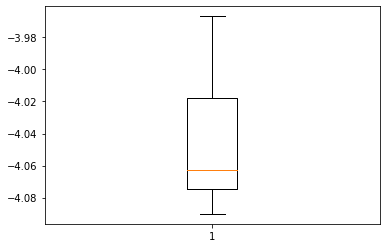

In [11]:
plt.boxplot(selector.grid_scores_)
print("cv_scores mean:'{}'".format(np.mean(selector.grid_scores_)))

RMSE: 3.4167645635232886


(array([ 2., 12., 33., 30., 23., 26., 16.,  7.,  2.,  3.]),
 array([ 7. ,  8.9, 10.8, 12.7, 14.6, 16.5, 18.4, 20.3, 22.2, 24.1, 26. ]),
 <a list of 10 Patch objects>)

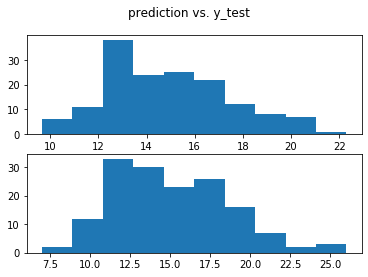

In [13]:
pred = selector.predict(X_test)
#using RMSE
print('RMSE: {}'.format(MSE(y_test,pred, squared = False)))
#check results distribution
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('prediction vs. y_test')
ax1.hist(pred)
ax2.hist(y_test)

https://machinelearningmastery.com/rfe-feature-selection-in-python/
https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

## Advice from Prof. Purtee: Ablation Studies
https://arxiv.org/abs/1901.08644

In [ ]:
Age, race, ethic, gender, marital status, education, BMI, cdxcode, stage, cecog

## KNN

In [24]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV as GS

y = ii_train_set['ISI']
xset = ii_train_set.drop(['ISI'], axis = 1).astype('float64')

X = xset[['Pain','cstage','Distance','Exercise_x','NightSweats','WeightGain',
         'Depression','Relations','Fatigue','Vomiting','regage']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

KNN_parameters = {"n_neighbors" : (3,5,10,15,20), "weights": ("uniform", "distance"), "p":(1,2,3)}
KNN = KNeighborsRegressor()
gs_KNN = GS(KNN, KNN_parameters, cv=5, verbose = 5, n_jobs = -1, scoring = "neg_root_mean_squared_error", return_train_score = True)
gs_KNN.fit(X_train,y_train)
KNN_result = pd.DataFrame(gs_KNN.cv_results_)
best_KNN = gs_KNN.best_estimator_
KNN_prediction = best_KNN.predict(X_test)
#print("best KNN RMSE on test: ", MSE(y_test, KNN_prediction,squared = False))
print("Test RMSE is: {}".format(mean_squared_error(y_test, KNN_prediction, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, KNN_prediction)))
para = KNN_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score','mean_train_score']])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s


Test RMSE is: 3.4981982720401015
Test MAE is: 2.7842083902215764
                                               params  mean_test_score  \
17  {'n_neighbors': 10, 'p': 3, 'weights': 'distan...        -3.926833   
25  {'n_neighbors': 20, 'p': 1, 'weights': 'distan...        -3.931030   
29  {'n_neighbors': 20, 'p': 3, 'weights': 'distan...        -3.934509   
23  {'n_neighbors': 15, 'p': 3, 'weights': 'distan...        -3.935931   
19  {'n_neighbors': 15, 'p': 1, 'weights': 'distan...        -3.941335   
15  {'n_neighbors': 10, 'p': 2, 'weights': 'distan...        -3.943866   
24  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}        -3.950602   
16  {'n_neighbors': 10, 'p': 3, 'weights': 'uniform'}        -3.951906   
28  {'n_neighbors': 20, 'p': 3, 'weights': 'uniform'}        -3.957049   
27  {'n_neighbors': 20, 'p': 2, 'weights': 'distan...        -3.957744   
18  {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}        -3.960989   
22  {'n_neighbors': 15, 'p': 3, 'weights': 'uni

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.4s finished


cv_scores mean:'-3.9268332897075005'


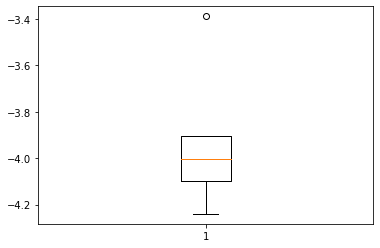

In [25]:
knn_cv = KNeighborsRegressor().set_params(**gs_KNN.best_params_)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring = "neg_root_mean_squared_error")
plt.boxplot(cv_scores)
print("cv_scores mean:'{}'".format(np.mean(cv_scores)))

(array([ 2., 12., 33., 30., 23., 26., 16.,  7.,  2.,  3.]),
 array([ 7. ,  8.9, 10.8, 12.7, 14.6, 16.5, 18.4, 20.3, 22.2, 24.1, 26. ]),
 <a list of 10 Patch objects>)

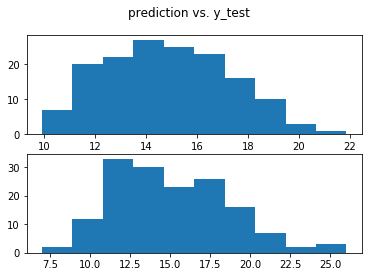

In [26]:
KNN_predict = KNeighborsRegressor().set_params(**gs_KNN.best_params_)
KNN_predict.fit(X_train, y_train)
prediction = KNN_predict.predict(X_test)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('prediction vs. y_test')
ax1.hist(prediction)
ax2.hist(y_test)

## KNN with additional features

In [27]:
X = xset[['Pain','cstage','Distance','Exercise_x','NightSweats','WeightGain',
          'Depression','Relations','Fatigue','Vomiting','regage','Race','Ethnic','Gender',
         'MaritalStatus','Education','BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]
X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

KNN_parameters = {"n_neighbors" : (3,5,10,15,20), "weights": ("uniform", "distance"), "p":(1,2,3)}
KNN = KNeighborsRegressor()
gs_KNN = GS(KNN, KNN_parameters, cv=5, verbose = 5, n_jobs = -1, scoring = "neg_root_mean_squared_error", return_train_score = True)
gs_KNN.fit(X_train,y_train)
KNN_result = pd.DataFrame(gs_KNN.cv_results_)
best_KNN = gs_KNN.best_estimator_
KNN_prediction = best_KNN.predict(X_test)

print("Test RMSE is: {}".format(mean_squared_error(y_test, KNN_prediction, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, KNN_prediction)))
para = KNN_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score','mean_train_score']])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s


Test RMSE is: 3.449094361182028
Test MAE is: 2.6987012987012986
                                               params  mean_test_score  \
24  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}        -4.063759   
25  {'n_neighbors': 20, 'p': 1, 'weights': 'distan...        -4.069746   
18  {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}        -4.089065   
19  {'n_neighbors': 15, 'p': 1, 'weights': 'distan...        -4.099399   
26  {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}        -4.107887   
27  {'n_neighbors': 20, 'p': 2, 'weights': 'distan...        -4.113275   
28  {'n_neighbors': 20, 'p': 3, 'weights': 'uniform'}        -4.128311   
29  {'n_neighbors': 20, 'p': 3, 'weights': 'distan...        -4.136447   
12  {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}        -4.148226   
20  {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}        -4.151635   
21  {'n_neighbors': 15, 'p': 2, 'weights': 'distan...        -4.157497   
22  {'n_neighbors': 15, 'p': 3, 'weights': 'unif

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.1s finished


cv_scores mean:'-4.063758702182097'


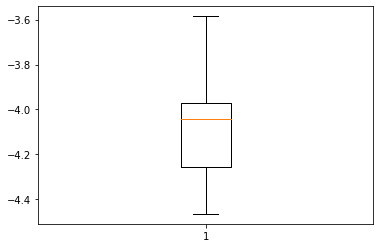

In [28]:
knn_cv = KNeighborsRegressor().set_params(**gs_KNN.best_params_)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring = "neg_root_mean_squared_error")
plt.boxplot(cv_scores)
print("cv_scores mean:'{}'".format(np.mean(cv_scores)))


(array([ 2., 12., 33., 30., 23., 26., 16.,  7.,  2.,  3.]),
 array([ 7. ,  8.9, 10.8, 12.7, 14.6, 16.5, 18.4, 20.3, 22.2, 24.1, 26. ]),
 <a list of 10 Patch objects>)

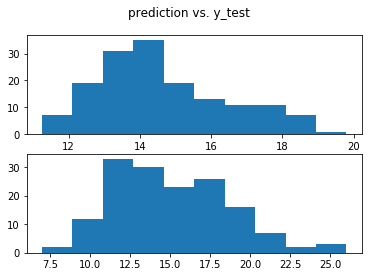

In [29]:
KNN_predict = KNeighborsRegressor().set_params(**gs_KNN.best_params_)
KNN_predict.fit(X_train, y_train)
prediction = KNN_predict.predict(X_test)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('prediction vs. y_test')
ax1.hist(prediction)
ax2.hist(y_test)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

y = ii_train_set['ISI']
xset = ii_train_set.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Pain','cstage','Distance','Exercise_x','NightSweats','WeightGain',
          'Depression','Relations','Fatigue','Vomiting','regage','Race','Ethnic','Gender',
         'MaritalStatus','Education','BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]
X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

linearmodel = LinearRegression().fit(X_train,y_train)
prediction = linearmodel.predict(X_test)
print("Test RMSE is: {}".format(MSE(y_test, prediction, squared = False)))
print("Test MAE is: {}".format(mean_absolute_error(y_test, prediction)))

Test RMSE is: 3.4168152625529156
Test MAE is: 2.6875963790763526


# Model Summary updated

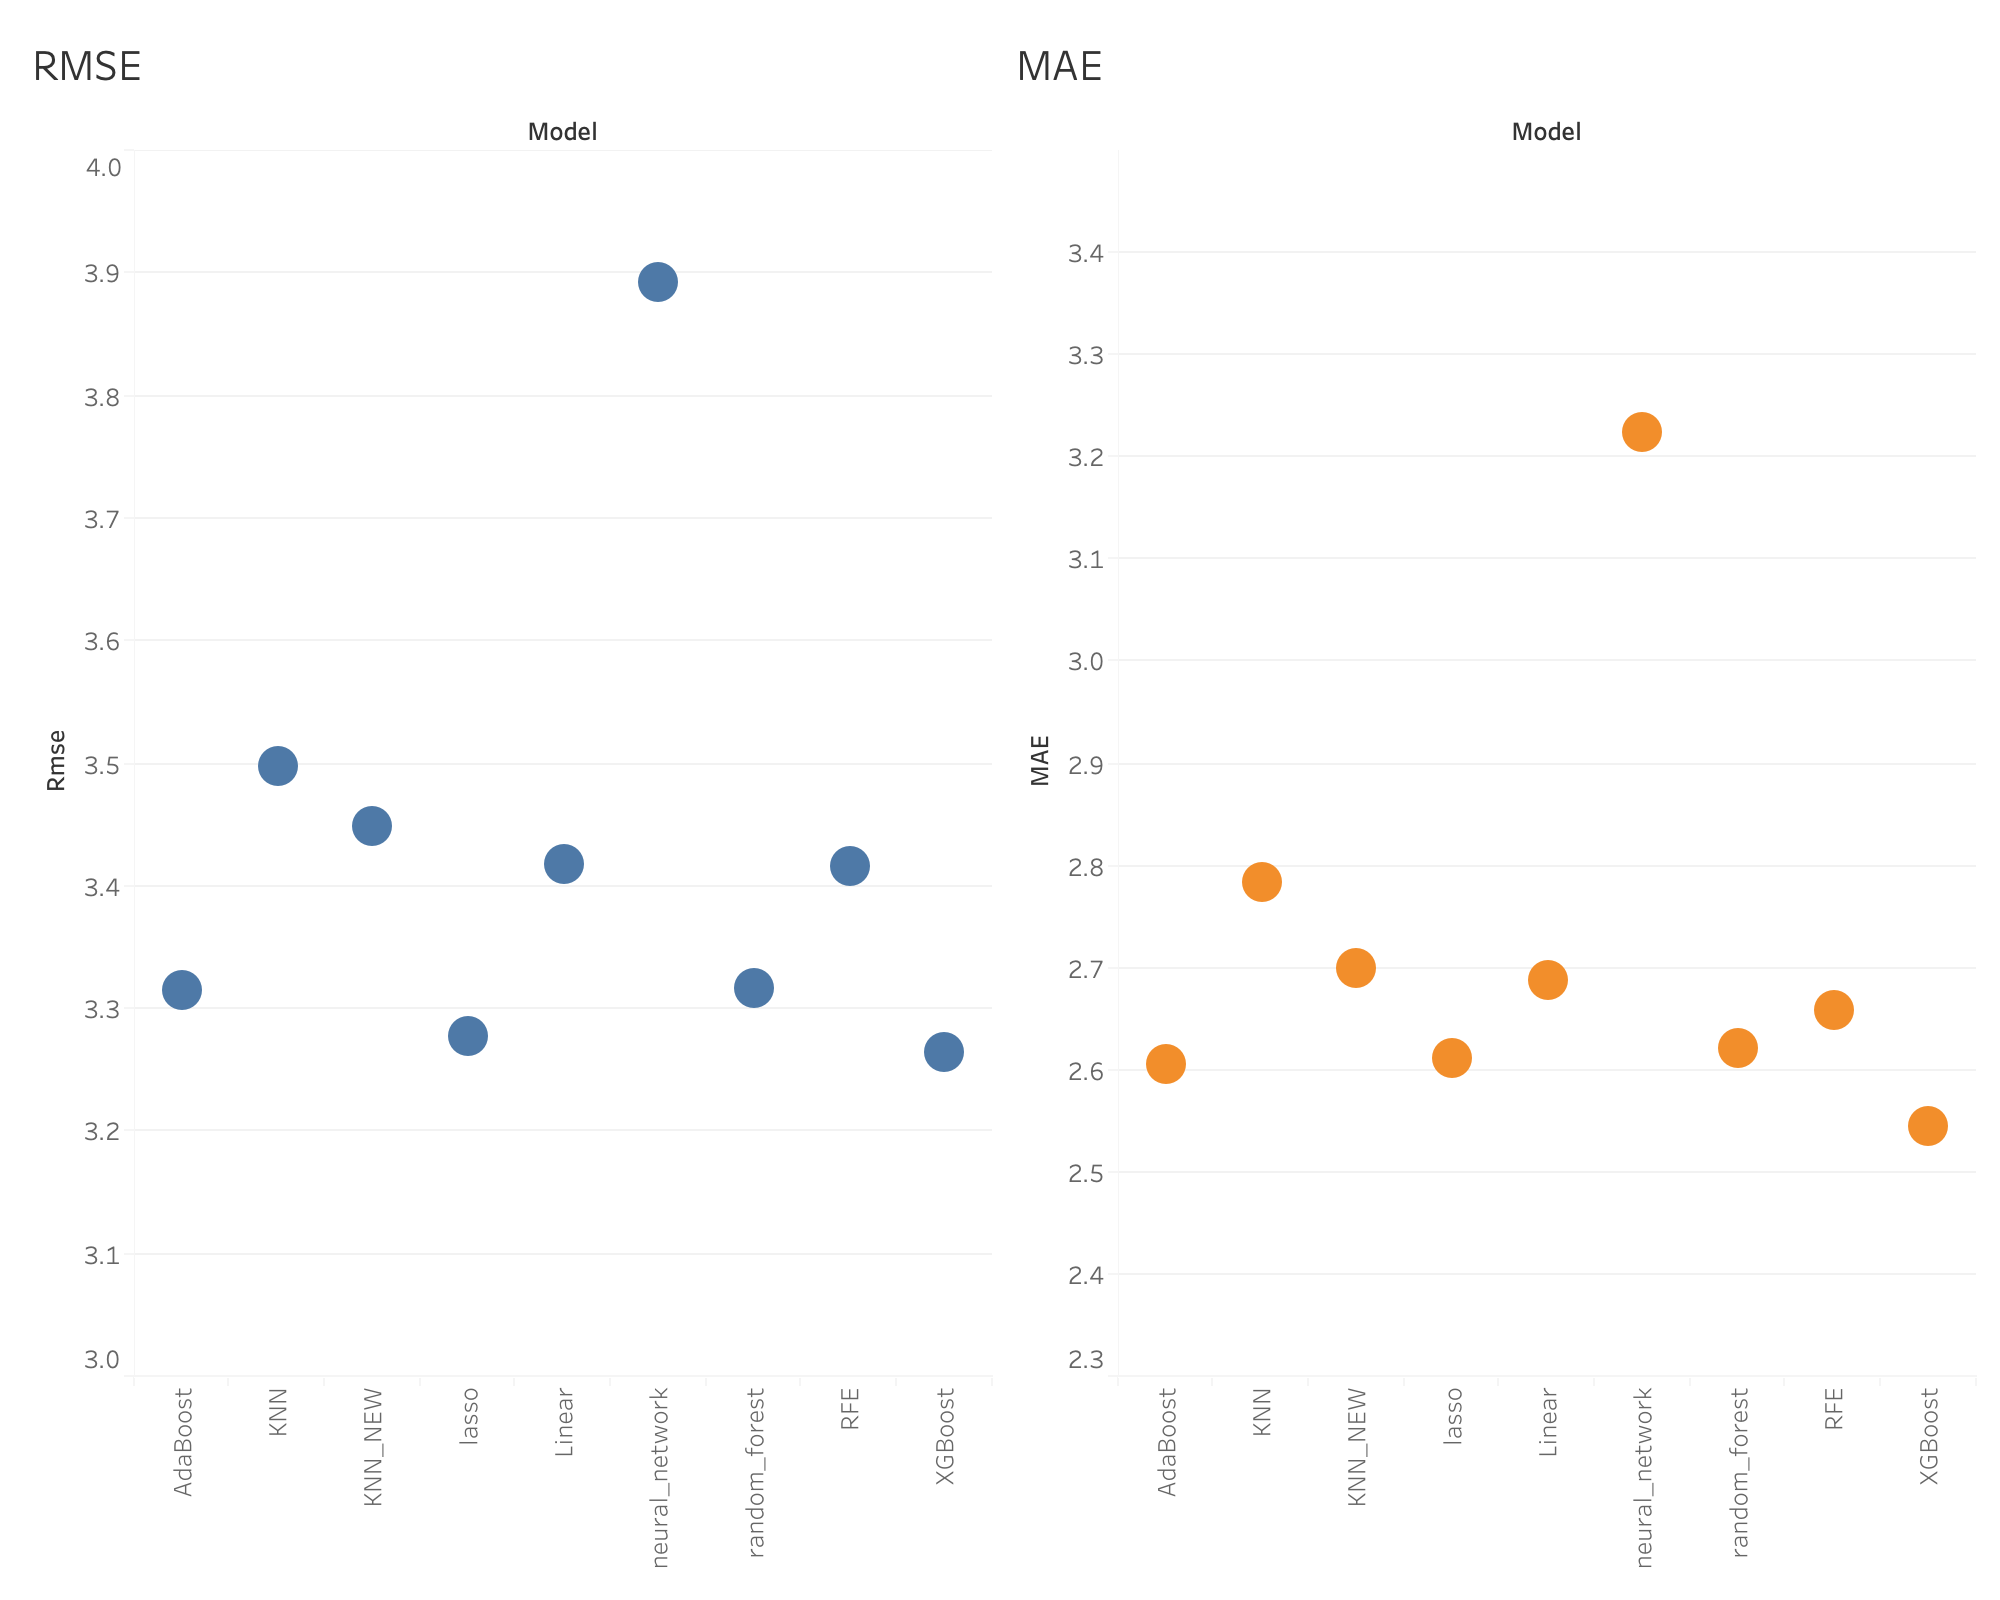

Plots:
1. adjusted-R2
2. var importance from XGBoost

Cut off for ISI:
    two models:
    1. 10 
    2. 19

# Binary Classification


In [23]:
#ISI 10-19 moderate, 19-28 severe
#cut point ISI 10
binary_10 = train_set.copy()
for index, isi in enumerate(binary_10['ISI']):
    if(isi < 10):
        binary_10['ISI'][index] = 0
    else:
        binary_10['ISI'][index] = 1

#cut point ISI 19
binary_19 = train_set.copy()
for index, isi in enumerate(binary_19['ISI']):
    if(isi <= 19):
        binary_19['ISI'][index] = 0
    else:
        binary_19['ISI'][index] = 1

<ipython-input-23-edb1c954070d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_10['ISI'][index] = 1
<ipython-input-23-edb1c954070d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_10['ISI'][index] = 0
<ipython-input-23-edb1c954070d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_19['ISI'][index] = 0
<ipython-input-23-edb1c954070d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [24]:
#imputation
# scikit-learn Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer(max_iter=10, random_state=0,min_value=0)
ii.fit(binary_10)
ii_10 = ii.transform(binary_10)
ii_10 = pd.DataFrame(ii_10).round(2)
ii_10.columns = list(train_set.columns.values)

ii2 = IterativeImputer(max_iter=10, random_state=0,min_value=0)
ii2.fit(binary_19)
ii_19 = ii2.transform(binary_19)
ii_19 = pd.DataFrame(ii_19).round(2)
ii_19.columns = list(train_set.columns.values)


#### check isi imbalanced

In [25]:
check10 = []
check10.append(binary_10['ISI'].loc[binary_10['ISI'] == 0].count()/binary_10['ISI'].count())
check10.append(binary_10['ISI'].loc[binary_10['ISI'] == 1].count()/binary_10['ISI'].count())
binary_10_imbalanced = pd.DataFrame(check10,columns=['cut point 10'])
binary_10_imbalanced

,cut point 10
0,0.074797
1,0.925203


In [26]:
check19 = []
check19.append(binary_19['ISI'].loc[binary_19['ISI'] == 0].count()/binary_19['ISI'].count())
check19.append(binary_19['ISI'].loc[binary_19['ISI'] == 1].count()/binary_19['ISI'].count())
binary_19_imbalanced = pd.DataFrame(check19,columns=['cut point 19'])
binary_19_imbalanced

,cut point 19
0,0.827642
1,0.172358


<BarContainer object of 2 artists>

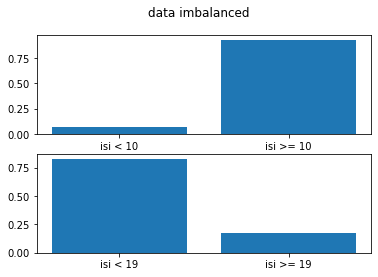

In [27]:
import matplotlib.pyplot as plt
dict10 = {"isi < 10":0.074797,"isi >= 10":0.925203}
dict19 = {"isi < 19":0.827642,"isi >= 19":0.172358}
fig, axs = plt.subplots(2)
fig.suptitle('data imbalanced')
axs[0].bar(dict10.keys(), dict10.values())
axs[1].bar(dict19.keys(),dict19.values())

## Logistic Regression

              precision    recall  f1-score   support

         0.0       0.13      0.92      0.23        12
         1.0       0.99      0.49      0.66       142

    accuracy                           0.53       154
   macro avg       0.56      0.70      0.44       154
weighted avg       0.92      0.53      0.62       154



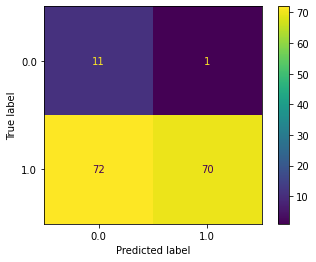

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

y = ii_10['ISI']
X = ii_10.drop(['ISI'], axis = 1).astype('float64')

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
b10 = LogisticRegression(class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X, y)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show()   

              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76       127
         1.0       0.30      0.67      0.41        27

    accuracy                           0.66       154
   macro avg       0.60      0.66      0.59       154
weighted avg       0.80      0.66      0.70       154



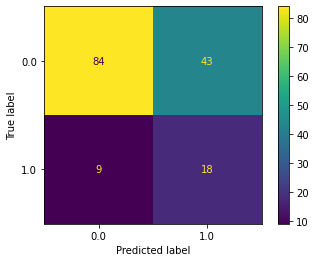

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
X = ii_19.drop(['ISI'], axis = 1).astype('float64')

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
b19 = LogisticRegression(class_weight={0:0.827642,1:0.172358}, solver = 'liblinear').fit(X, y)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show()   

## lasso + key demo

              precision    recall  f1-score   support

         0.0       0.14      0.92      0.24        12
         1.0       0.99      0.51      0.67       142

    accuracy                           0.54       154
   macro avg       0.56      0.71      0.45       154
weighted avg       0.92      0.54      0.64       154



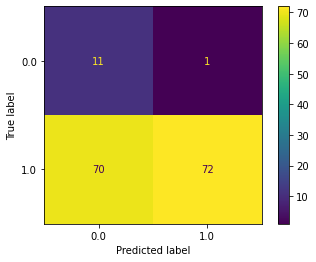

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
b10 = LogisticRegression(class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X, y)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show()   

              precision    recall  f1-score   support

         0.0       0.88      0.69      0.77       127
         1.0       0.27      0.56      0.37        27

    accuracy                           0.66       154
   macro avg       0.58      0.62      0.57       154
weighted avg       0.77      0.66      0.70       154



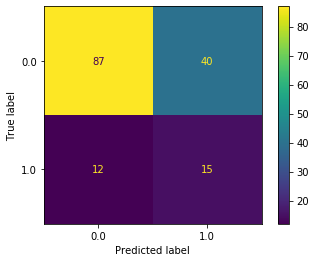

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
b19 = LogisticRegression(class_weight={0:0.827642,1:0.172358}, solver = 'liblinear').fit(X, y)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show()   

### lasso

              precision    recall  f1-score   support

         0.0       0.15      1.00      0.26        12
         1.0       1.00      0.51      0.67       142

    accuracy                           0.55       154
   macro avg       0.57      0.75      0.46       154
weighted avg       0.93      0.55      0.64       154



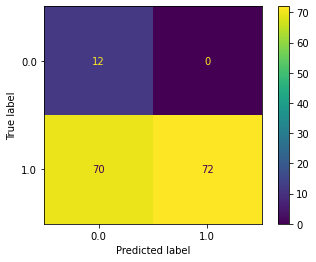

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
b10 = LogisticRegression(class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X, y)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show()   

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       127
         1.0       0.44      0.63      0.52        27

    accuracy                           0.79       154
   macro avg       0.67      0.73      0.69       154
weighted avg       0.83      0.79      0.81       154



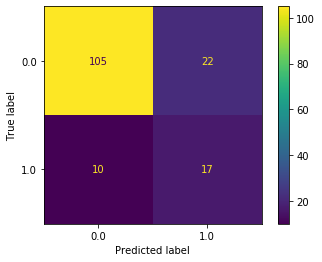

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
b19 = LogisticRegression(class_weight={0:0.827642,1:0.172358}, solver = 'liblinear').fit(X_train, y_train)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show()   

## xgboost top 20 features

              precision    recall  f1-score   support

         0.0       0.11      0.67      0.18        12
         1.0       0.95      0.53      0.68       142

    accuracy                           0.54       154
   macro avg       0.53      0.60      0.43       154
weighted avg       0.88      0.54      0.64       154



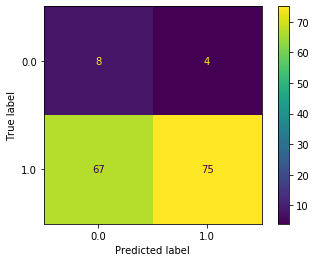

In [13]:
top = ['QoL','Fatigue','Depression','Exercise_x','ADL','cecog_1','HotFlashes','Work','Walking','Relations','Weakness',
       'ProblemRemember','ProblemConcentrate','Race','VO2','Anxiety','PhysicalActivity','LackAppetite','Distance','NightSweats']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['QoL','Fatigue','Depression','Exercise_x','ADL','cecog_1','HotFlashes','Work','Walking','Relations','Weakness',
       'ProblemRemember','ProblemConcentrate','Race','VO2','Anxiety','PhysicalActivity','LackAppetite','Distance','NightSweats']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
b10 = LogisticRegression(class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X, y)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show() 

              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       127
         1.0       0.32      0.70      0.44        27

    accuracy                           0.68       154
   macro avg       0.62      0.69      0.61       154
weighted avg       0.81      0.68      0.72       154



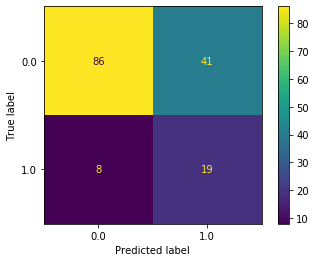

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['QoL','Fatigue','Depression','Exercise_x','ADL','cecog_1','HotFlashes','Work','Walking','Relations','Weakness',
       'ProblemRemember','ProblemConcentrate','Race','VO2','Anxiety','PhysicalActivity','LackAppetite','Distance','NightSweats']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
b19 = LogisticRegression(class_weight={0:0.827642,1:0.172358},solver = 'liblinear').fit(X, y)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show()

## KNN

### lasso

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV as GS
from sklearn.metrics import f1_score
KNN_parameters = {"n_neighbors" : (3,5,10,15,20), "weights": ("uniform", "distance"), "p":(1,2,3)}
KNN = KNeighborsClassifier()
gs_KNN = GS(KNN, KNN_parameters, cv=5, verbose = 5, n_jobs = -1, scoring = "f1", return_train_score = True)
gs_KNN.fit(X_train,y_train)
KNN_result = pd.DataFrame(gs_KNN.cv_results_)
para = KNN_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score']])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s


                                               params  mean_test_score
29  {'n_neighbors': 20, 'p': 3, 'weights': 'distan...         0.961708
17  {'n_neighbors': 10, 'p': 3, 'weights': 'distan...         0.961708
15  {'n_neighbors': 10, 'p': 2, 'weights': 'distan...         0.961708
28  {'n_neighbors': 20, 'p': 3, 'weights': 'uniform'}         0.961708
13  {'n_neighbors': 10, 'p': 1, 'weights': 'distan...         0.961708
20  {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}         0.961708
21  {'n_neighbors': 15, 'p': 2, 'weights': 'distan...         0.961708
18  {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}         0.961708
19  {'n_neighbors': 15, 'p': 1, 'weights': 'distan...         0.961708
22  {'n_neighbors': 15, 'p': 3, 'weights': 'uniform'}         0.961708
23  {'n_neighbors': 15, 'p': 3, 'weights': 'distan...         0.961708
24  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}         0.961708
25  {'n_neighbors': 20, 'p': 1, 'weights': 'distan...         0.961708
26  {'

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


              precision    recall  f1-score   support

         0.0       1.00      0.08      0.15        12
         1.0       0.93      1.00      0.96       142

    accuracy                           0.93       154
   macro avg       0.96      0.54      0.56       154
weighted avg       0.93      0.93      0.90       154



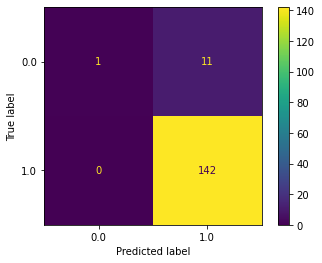

In [73]:
best_KNN = gs_KNN.best_estimator_
KNN_prediction = best_KNN.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_prediction))
plot_confusion_matrix(best_KNN, X_test, y_test)  
plt.show()   

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV as GS
from sklearn.metrics import f1_score
KNN_parameters = {"n_neighbors" : (3,5,10,15,20), "weights": ("uniform", "distance"), "p":(1,2,3)}
KNN = KNeighborsClassifier()
gs_KNN = GS(KNN, KNN_parameters, cv=5, verbose = 5, n_jobs = -1, scoring = "f1", return_train_score = True)
gs_KNN.fit(X_train,y_train)
KNN_result = pd.DataFrame(gs_KNN.cv_results_)
para = KNN_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score']])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s


                                               params  mean_test_score
4    {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}         0.249084
5   {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}         0.249084
2    {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}         0.235227
3   {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}         0.235227
0    {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}         0.220111
1   {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}         0.220111
6    {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}         0.183544
7   {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}         0.183544
9   {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}         0.174545
8    {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}         0.174545
19  {'n_neighbors': 15, 'p': 1, 'weights': 'distan...         0.170898
17  {'n_neighbors': 10, 'p': 3, 'weights': 'distan...         0.166433
13  {'n_neighbors': 10, 'p': 1, 'weights': 'distan...         0.162523
15  {'

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.9s finished


              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       127
         1.0       0.35      0.22      0.27        27

    accuracy                           0.79       154
   macro avg       0.60      0.57      0.58       154
weighted avg       0.76      0.79      0.77       154



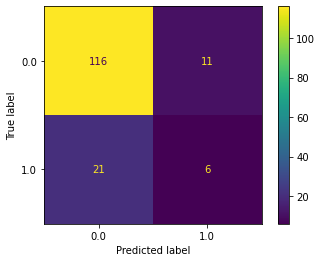

In [75]:
best_KNN = gs_KNN.best_estimator_
KNN_prediction = best_KNN.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_prediction))
plot_confusion_matrix(best_KNN, X_test, y_test)  
plt.show()   

### lasso+key demo

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV as GS
from sklearn.metrics import f1_score
KNN_parameters = {"n_neighbors" : (10,15,20,30), "weights": ("uniform", "distance"), "p":(1,2,3)}
KNN = KNeighborsClassifier()
gs_KNN = GS(KNN, KNN_parameters, cv=5, verbose = 5, n_jobs = -1, scoring = "f1", return_train_score = True)
gs_KNN.fit(X_train,y_train)
KNN_result = pd.DataFrame(gs_KNN.cv_results_)
para = KNN_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score']])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s


                                               params  mean_test_score
11  {'n_neighbors': 15, 'p': 3, 'weights': 'distan...         0.961708
21  {'n_neighbors': 30, 'p': 2, 'weights': 'distan...         0.961708
20  {'n_neighbors': 30, 'p': 2, 'weights': 'uniform'}         0.961708
19  {'n_neighbors': 30, 'p': 1, 'weights': 'distan...         0.961708
18  {'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}         0.961708
17  {'n_neighbors': 20, 'p': 3, 'weights': 'distan...         0.961708
16  {'n_neighbors': 20, 'p': 3, 'weights': 'uniform'}         0.961708
15  {'n_neighbors': 20, 'p': 2, 'weights': 'distan...         0.961708
14  {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}         0.961708
13  {'n_neighbors': 20, 'p': 1, 'weights': 'distan...         0.961708
12  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}         0.961708
23  {'n_neighbors': 30, 'p': 3, 'weights': 'distan...         0.961708
10  {'n_neighbors': 15, 'p': 3, 'weights': 'uniform'}         0.961708
9   {'

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.4s finished


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.92      0.99      0.95       142

    accuracy                           0.91       154
   macro avg       0.46      0.49      0.48       154
weighted avg       0.85      0.91      0.88       154



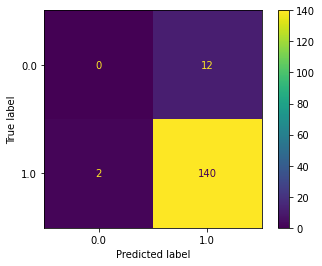

In [77]:
best_KNN = gs_KNN.best_estimator_
KNN_prediction = best_KNN.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_prediction))
plot_confusion_matrix(best_KNN, X_test, y_test)  
plt.show()   

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV as GS
from sklearn.metrics import f1_score
KNN_parameters = {"n_neighbors" : (3,5,10,15,20), "weights": ("uniform", "distance"), "p":(1,2,3)}
KNN = KNeighborsClassifier()
gs_KNN = GS(KNN, KNN_parameters, cv=5, verbose = 5, n_jobs = -1, scoring = "f1", return_train_score = True)
gs_KNN.fit(X_train,y_train)
KNN_result = pd.DataFrame(gs_KNN.cv_results_)
para = KNN_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score']])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s


                                               params  mean_test_score
3   {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}         0.247366
2    {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}         0.235872
5   {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}         0.231212
4    {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}         0.219718
9   {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}         0.172857
8    {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}         0.172857
7   {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}         0.163317
11  {'n_neighbors': 5, 'p': 3, 'weights': 'distance'}         0.163175
10   {'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}         0.163175
0    {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}         0.160946
1   {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}         0.160946
6    {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}         0.146719
13  {'n_neighbors': 10, 'p': 1, 'weights': 'distan...         0.112693
21  {'

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.4s finished


              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       127
         1.0       0.19      0.11      0.14        27

    accuracy                           0.76       154
   macro avg       0.51      0.50      0.50       154
weighted avg       0.71      0.76      0.73       154



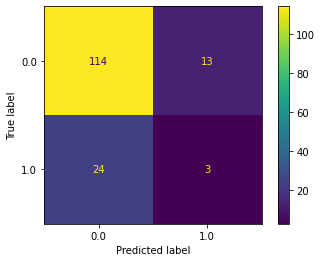

In [79]:
best_KNN = gs_KNN.best_estimator_
KNN_prediction = best_KNN.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_prediction))
plot_confusion_matrix(best_KNN, X_test, y_test)  
plt.show()   

# Random Forest

/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.92      1.00      0.96       142

    accuracy                           0.92       154
   macro avg       0.46      0.50      0.48       154
weighted avg       0.85      0.92      0.88       154



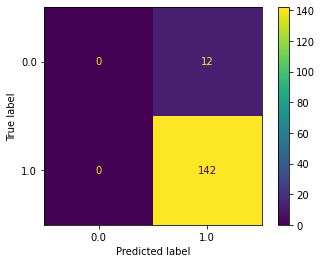

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
from sklearn.model_selection import GridSearchCV as GS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
'''
param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [1000, 1200, 1400, 1600]}

from sklearn.metrics import f1_score

rfc = RandomForestClassifier()
gs_rfc = GS(rfc, param_grid, cv=5, verbose = 5, n_jobs = -1, scoring = "f1", return_train_score = True)
gs_rfc.fit(X_train,y_train)
rfc_result = pd.DataFrame(gs_rfc.cv_results_)
para = rfc_result.sort_values(by='rank_test_score')
print(para[['params','mean_test_score']])
'''
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=3, min_samples_split=5,
                      n_estimators=1400,random_state=42)

model.fit(X_train, y_train)
rfc_prediction = model.predict(X_test)
print(classification_report(y_test,rfc_prediction))
plot_confusion_matrix(model, X_test, y_test)  
plt.show()   

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91       127
         1.0       0.57      0.15      0.24        27

    accuracy                           0.83       154
   macro avg       0.71      0.56      0.57       154
weighted avg       0.80      0.83      0.79       154



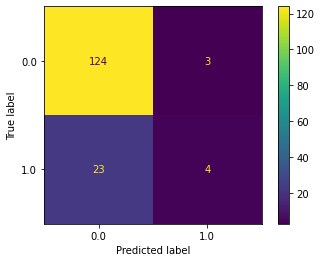

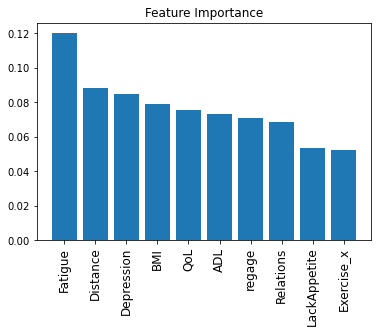

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance','regage','Race','Ethnic','Gender','MaritalStatus','Education',
                     'BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
from sklearn.model_selection import GridSearchCV as GS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=3, min_samples_split=5,
                      n_estimators=1400,random_state=42)

model.fit(X_train, y_train)
rfc_prediction = model.predict(X_test)
print(classification_report(y_test,rfc_prediction))
plot_confusion_matrix(model, X_test, y_test)  
plt.show()   
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.bar(range(10), importances[indices][0:10])
# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90, fontsize = 12)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

# XGBoost

Lasso predictors

In [187]:
#lasso coefficients != 0
lasso_predictors = [['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

demo = [['regage','Race','Ethnic','Gender','MaritalStatus','Education','BMI','cDXCode','cecog_0','cecog_1','cecog_2 or Greater']]


import time
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

start_time=time.time()

y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)

In [148]:
def XGB_tuning(X_train,y_train):


    param_tuning = {
        'learning_rate': [0.05, 0.1， 0.2],
        'max_depth': [1, 2, 3],
        'min_child_weight': [1, 3],
        'subsample': [0.3, 0.5, 0.7],
        'colsample_bytree': [0.6, 0.8],
        'n_estimators' : [500, 750, 1000],
        'objective': ['reg:logistic']}

    xgb_model = XGBClassifier(use_label_encoder=False)
    
    gsearch = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,                        
                        #scoring = 'neg_mean_absolute_error', #MAE
                        scoring = 'accuracy',
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)
    
    gsearch.fit(X_train,y_train)
    return gsearch.best_params_

In [147]:
best_params = XGB_tuning(X_train,y_train)
best_params

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.005,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 250,
 'objective': 'reg:logistic',
 'subsample': 0.5}

[15:00:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.92      1.00      0.96       142

    accuracy                           0.92       154
   macro avg       0.46      0.50      0.48       154
weighted avg       0.85      0.92      0.88       154



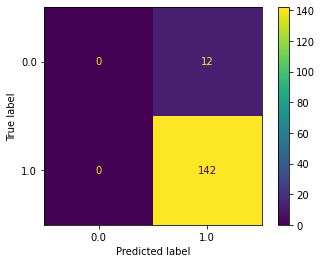

In [189]:
xgb_model = XGBClassifier(
        objective = 'binary:logistic',
        colsample_bytree = 0.3,
        learning_rate = 0.05,
        max_depth = 1,
        min_child_weight = 1,
        n_estimators = 250,
        subsample = 0.5,
        random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(xgb_model, X_test, y_test)  
plt.show()   

scoring metrics option: https://stackoverflow.com/questions/59377154/balanced-accuracy-is-not-a-valid-scoring-value-in-scikit-learn

In [192]:
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
best_params = XGB_tuning(X_train,y_train)
best_params

[15:03:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       127
         1.0       0.80      0.15      0.25        27

    accuracy                           0.84       154
   macro avg       0.82      0.57      0.58       154
weighted avg       0.84      0.84      0.80       154



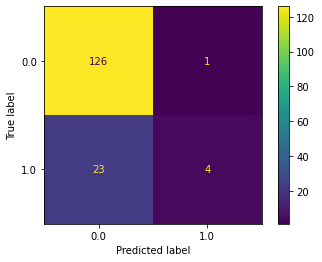

In [196]:
xgb_model = XGBClassifier(
        objective = 'binary:logistic',
        colsample_bytree = 0.3,
        learning_rate = 0.2,
        max_depth = 2,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.8,
        random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(xgb_model, X_test, y_test)  
plt.show()     

1. Add linear regression 
2. Add lasso to the plot
3. Try model visualization/interpretation methods from email
4. Using lasso regression for classification
5. data imbalance issue (SMOTE)
6. Prepare slides for presentation (Add network)
7. Graph or coefficient plot for lasso feature importance?
8. logistic regression using xgboost top 20 features?

Note: recall is most important for classification; adjust figures 

Think about take home message

30 mins
Linear model: XGBoost 
binary model: Logistic regression
takeaway: important features

## By setting penalty to l1, we can simulate lasso using logistic regression
## Use only lasso features
https://scikit-learn.org/stable/modules/linear_model.html

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       127
         1.0       0.00      0.00      0.00        27

    accuracy                           0.82       154
   macro avg       0.41      0.50      0.45       154
weighted avg       0.68      0.82      0.75       154



/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


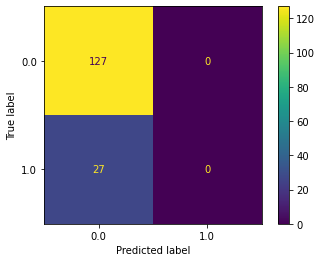

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


#change penalty to L1 to simulate lasso
b19 = LogisticRegression(penalty = 'l1',class_weight={0:0.827642,1:0.172358}, solver = 'liblinear').fit(X_train, y_train)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show()

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.92      1.00      0.96       142

    accuracy                           0.92       154
   macro avg       0.46      0.50      0.48       154
weighted avg       0.85      0.92      0.88       154



/Users/fanyangxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


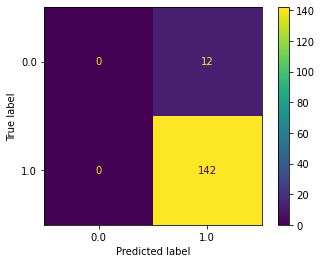

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]


X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


#change penalty to L1 to simulate lasso
b10 = LogisticRegression(penalty = 'l1',class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X_train, y_train)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show()

# SMOTE

Counter({1.0: 427, 0.0: 34})
Counter({0.0: 427, 1.0: 427})
              precision    recall  f1-score   support

         0.0       0.15      0.58      0.24        12
         1.0       0.95      0.72      0.82       142

    accuracy                           0.71       154
   macro avg       0.55      0.65      0.53       154
weighted avg       0.89      0.71      0.77       154



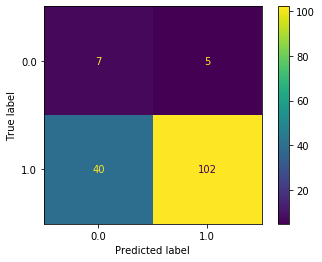

In [9]:
from collections import Counter
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

'''
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
'''
X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

counter = Counter(y_train)
print(counter)

#SMOTE Resampling
sm = SMOTE(random_state = 42) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 

counter = Counter(y_train)
print(counter)


'''
b10 = LogisticRegression(class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X, y)
'''
# Weight set to be 0.5 : 0.5 after resampling 
b10 = LogisticRegression(class_weight='balanced', solver = 'liblinear').fit(X_train, y_train)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show()

Counter({0.0: 382, 1.0: 79})
Counter({0.0: 382, 1.0: 382})
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83       127
         1.0       0.37      0.70      0.49        27

    accuracy                           0.74       154
   macro avg       0.65      0.73      0.66       154
weighted avg       0.83      0.74      0.77       154



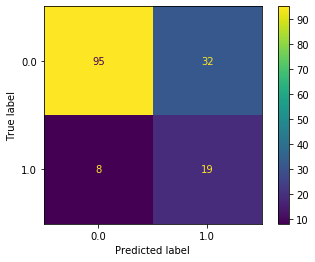

In [10]:
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['Fatigue','Depression','LackAppetite','HotFlashes','NightSweats','ADL','Relations','Walking',
                     'Exercise_x','QoL','Employed','Distance']]

'''
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
'''
X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

counter = Counter(y_train)
print(counter)

#SMOTE Resampling
sm = SMOTE(random_state = 42) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 

counter = Counter(y_train)
print(counter)

'''
b19 = LogisticRegression(class_weight={0:0.827642,1:0.172358}, solver = 'liblinear').fit(X, y)
'''
# Weight set to be 0.5 : 0.5 after resampling 
b19 = LogisticRegression(class_weight='balanced', solver = 'liblinear').fit(X_train, y_train)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show()

## xgboost top 20

Counter({1.0: 427, 0.0: 34})
Counter({0.0: 427, 1.0: 427})
              precision    recall  f1-score   support

         0.0       0.16      0.58      0.25        12
         1.0       0.95      0.73      0.83       142

    accuracy                           0.72       154
   macro avg       0.55      0.66      0.54       154
weighted avg       0.89      0.72      0.78       154



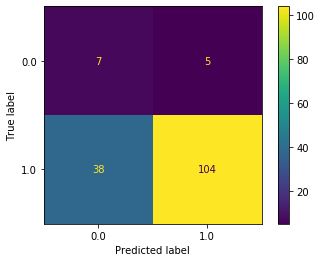

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
y = ii_10['ISI']
xset = ii_10.drop(['ISI'], axis = 1).astype('float64')
X = xset[['QoL','Fatigue','Depression','Exercise_x','ADL','cecog_1','HotFlashes','Work','Walking','Relations','Weakness',
       'ProblemRemember','ProblemConcentrate','Race','VO2','Anxiety','PhysicalActivity','LackAppetite','Distance','NightSweats']]
'''
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
'''
X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

counter = Counter(y_train)
print(counter)

#SMOTE Resampling
sm = SMOTE(random_state = 42) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 

counter = Counter(y_train)
print(counter)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

'''
b10 = LogisticRegression(class_weight={0:0.074797,1:0.925203}, solver = 'liblinear').fit(X, y)
'''

# Weight set to be 0.5 : 0.5 after resampling 
b10 = LogisticRegression(class_weight='balanced', solver = 'liblinear').fit(X_train, y_train)
prediction = b10.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b10, X_test, y_test)  
plt.show() 

Counter({0.0: 382, 1.0: 79})
Counter({0.0: 382, 1.0: 382})
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82       127
         1.0       0.36      0.70      0.48        27

    accuracy                           0.73       154
   macro avg       0.64      0.72      0.65       154
weighted avg       0.82      0.73      0.76       154



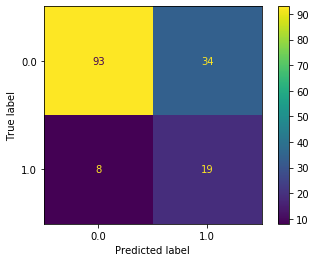

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
y = ii_19['ISI']
xset = ii_19.drop(['ISI'], axis = 1).astype('float64')
X = xset[['QoL','Fatigue','Depression','Exercise_x','ADL','cecog_1','HotFlashes','Work','Walking','Relations','Weakness',
       'ProblemRemember','ProblemConcentrate','Race','VO2','Anxiety','PhysicalActivity','LackAppetite','Distance','NightSweats']]

'''
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
'''

X_train, X_test,y_train, y_test = train_test_split(X, y, shuffle = True, random_state=42, stratify=y)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

counter = Counter(y_train)
print(counter)

#SMOTE Resampling
sm = SMOTE(random_state = 42) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 

counter = Counter(y_train)
print(counter)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
'''
b19 = LogisticRegression(class_weight={0:0.827642,1:0.172358}, solver = 'liblinear').fit(X, y)
'''
b19 = LogisticRegression(class_weight='balanced', solver = 'liblinear').fit(X_train, y_train)
prediction = b19.predict(X_test)
print(classification_report(y_test,prediction))
plot_confusion_matrix(b19, X_test, y_test)  
plt.show() 

## Best classifier: isi 19 logistic regression & isi 19 SMOTE

In [ ]:
1. focus on model for isi 19